<a href="https://colab.research.google.com/github/edenfrij/data_science_project_repo/blob/main/new_and_final_project_FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

I am Eden Frig (313431454), a computer science student with a dream of becoming a scientist who contributes to making the world a better place, a dream I’ve had since a young age. Now, at 29 years old, I am navigating my path toward this goal in a technology-driven world, And this is the reason why I am excited to be working on this project.

When selecting a topic for my project, I investigated Facial Emotion Recognition (FER) technology, which enables computers to classify emotions expressed on people's faces. I explored the significance of FER technology and its real-life applications.


This technology offers significant benefits to the field of human-computer interaction. Finding it fascinating, I decided to focus my project on this topic.



In this project I used 2 datasets for Facial Emotion Recognition:
1. FER2013
2. RAF-DB


## The Problem
For over two decades, the field of Facial Expression Recognition (FER) has been researched with the aim of achieving human-machine communication.

Facial expressions play a crucial role in human interaction because the face is often the primary source of information. They convey various details about the person, such as age, gender, race, and emotional states. Additionally, studies have shown that facial expressions carry a greater percentage of communicative information than any other non-verbal means of communication, such as hand and body movements.

The use of FER (Facial Emotion Recognition) technology extends across many fields involving human-machine interaction. Some of the areas using this technique include:


- **Education**: FER monitors students' emotions in real time, allowing adjustments to teaching strategies, crucial in virtual learning environments such as Zoom, which became a popular education and communication platform during the pandemic.

- **Medicine**:
In medicine, FER technology offers significant benefits:
1. Neuropsychiatric Disorders: FER helps diagnose emotional expression differences between patients with conditions like Tourette syndrome and healthy individuals.
2. Patient Care Feedback: It allows healthcare providers to better understand patient emotions during treatment and make necessary adjustments.
3. Autism: FER aids in assessing emotional reactions of individuals with autism, facilitating appropriate interventions.
4. Additional Applications: The technology is also useful in psychological disorders, rehabilitation, and music therapy and more.
FER provides a more objective approach and reduces the need for extensive human effort in these areas.
- **Marketing**: FER analyzes user behavior to provide objective insights into customer interest and public opinion on advertising.

- **Robotics**: FER enhances robots' effectiveness by enabling them to recognize and respond to operators' facial expressions.

- **Other fields**: FER improves security by detecting malicious intentions, aids forensic investigations with lie detection, monitors driver fatigue and distractions, detects fear in critical tasks, and helps manage stress and more.


In this project, my goal is to investigate different models and achieve a robust model that can classify seven types of emotions (angry, disgust, fear, happy, neutral, sad, and surprised) and perform well on the two datasets I have chosen.


#DATA COLLECTING
Data was collected directly from Kaggle, the first dataset is [FER2013](https://www.kaggle.com/datasets/msambare/fer2013)
and the second is [RAF-DB](https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset).

In my project, I chose to work with these two datasets to ensure diversity and enhance the training process. The first dataset, FER2013, is known to be one of the most complex datasets in the field of facial emotion recognition (FER). It consists of grayscale images and was created using Google's image search API, adapted to a set of 184 emotion-related keywords. The facial expressions in this dataset are categorized under the "wild" category, meaning they were captured in everyday natural situations without strict control over lighting conditions, head positions, backgrounds, or other environmental factors.

The second dataset, RAF-DB, contains colored images collected from the real world and also falls under the "wild" category. This parameter is very important as it closely resembles real-world situations where people are not taking photos in specific postures or controlled lighting (laboratory) conditions.



In [49]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 81% 49.0M/60.3M [00:00<00:00, 69.8MB/s]
100% 60.3M/60.3M [00:00<00:00, 74.0MB/s]


In [8]:
!kaggle datasets download -d shuvoalok/raf-db-dataset

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset
License(s): other
100% 37.7M/37.7M [00:00<00:00, 79.1MB/s]
100% 37.7M/37.7M [00:00<00:00, 65.0MB/s]


In [ ]:
# I removed the print statements for a cleaner view
!unzip /content/fer2013.zip -d /content/FER2013

In [39]:
# I removed the print statements for a cleaner view
!unzip /content/raf-db-dataset.zip -d /content/RAF-DB

#EDA

In this stage, I will explore both datasets separately. This approach ensures that I understand how to handle each dataset individually. When I need to use both together, I will know the differences and how to bridge the gap.

First we will do the needed imports:


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image
import dask
import cv2; print (cv2.__version__)
from dask import bag
from dask.diagnostics import ProgressBar
import seaborn as sns
from IPython.display import display, HTML

4.10.0


##Destribution

The RAF-DB dataset consists of 7 emotion classes. It includes two CSV files describing the labels for both test and train data groups, as well as two main directories (test and train) that contain the image data. The directories inside the two main directories are organized according to the labels, with each subdirectory corresponding to a specific emotion.

The labels in this dataset are numbers from 1 to 7, each representing a different emotion. The emotions and their corresponding labels are described as follows:


In [12]:
labels_mapping_raf_db={
    1 : 'surprise',
    2 : 'fear',
    3 : 'disgust',
    4 : 'happy',
    5 : 'sad',
    6 : 'angry',
    7 : 'neutral'
}
df = pd.DataFrame(list(labels_mapping_raf_db.items()), columns=['Label', 'Emotion'])

html_table = df.to_html(index=False)
display(HTML(html_table))

Label,Emotion
1,surprise
2,fear
3,disgust
4,happy
5,sad
6,angry
7,neutral


Before approaching the analysis, let's organize our datasets:

In [13]:
#The path of the directories in my project
raf_db_train_labels_path = '/content/RAF-DB/train_labels.csv'
raf_db_test_labels_path = '/content/RAF-DB/test_labels.csv'
raf_db_train_set_path = '/content/RAF-DB/DATASET/train'
raf_db_test_set_path = '/content/RAF-DB/DATASET/test'
fer2013_train_dir = '/content/FER2013/train'
fer2013_test_dir = '/content/FER2013/test'

#creating dictionaries which the key's are the emotion and the values are the path urls
train_dirs_fer2013={}
for dir in os.listdir(fer2013_train_dir):
  dir_name = os.path.basename(dir)
  train_dirs_fer2013[dir_name] =os.path.join(fer2013_train_dir, os.path.basename(dir))

test_dirs_fer2013={}
for dir in os.listdir(fer2013_test_dir):
  dir_name = os.path.basename(dir)
  test_dirs_fer2013[dir_name] = os.path.join(fer2013_test_dir, os.path.basename(dir))

train_dirs_raf_db={}
for dir in os.listdir(raf_db_train_set_path):
  dir_name = labels_mapping_raf_db.get(int(dir))
  new_dir = raf_db_train_set_path+'/'+dir_name
  old_path_dir = raf_db_train_set_path+'/'+ dir
  os.rename(old_path_dir,new_dir)
  train_dirs_raf_db[dir_name] = new_dir

test_dirs_raf_db={}
for dir in os.listdir(raf_db_test_set_path):
  dir_name = labels_mapping_raf_db.get(int(dir))
  new_dir = raf_db_test_set_path+'/'+dir_name
  old_path_dir = raf_db_test_set_path+'/' + dir
  os.rename(old_path_dir,new_dir)
  test_dirs_raf_db[dir_name] =new_dir

all_image_dirs = [raf_db_train_set_path,raf_db_test_set_path,fer2013_train_dir,fer2013_test_dir]

In this part, I will use the CSV files for the RAF-DB dataset to create the distributions.
After the EDA phase, we will use only the image directories in RAF-DB to align the processing workflow with that of the other dataset.
Let's examine the distribution of the training set in RAF-DB


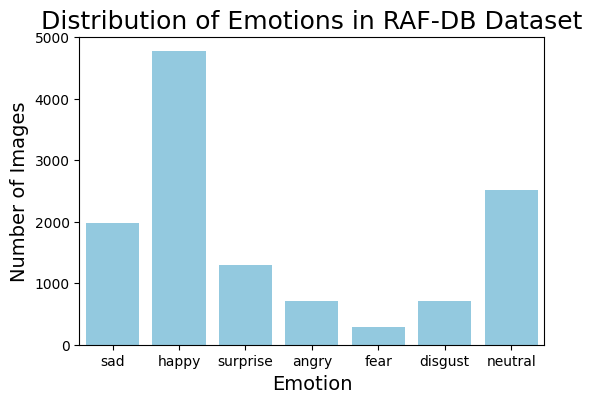

In [14]:
raf_db_train_labels = pd.read_csv(raf_db_train_labels_path)

# Count occurrences of each emotion
train_class_counts_raf_db = raf_db_train_labels['label'].value_counts()

# Map numerical labels to emotion names for plotting
train_class_counts_raf_db.index = train_class_counts_raf_db.index.map(labels_mapping_raf_db)

raf_db_train_labels['emotion'] = raf_db_train_labels['label'].map(labels_mapping_raf_db)

# plotting
fig, ax = plt.subplots(figsize=(6, 4))
plt.title('Distribution of Emotions in RAF-DB Dataset', fontsize=18)
plt.ylabel('Number of Images', fontsize=14)
plt.xlabel('Emotion', fontsize=14)
sns.countplot(data=raf_db_train_labels,x='emotion', ax=ax, color='skyblue')
plt.show()

As we can see in this dataset, there is a significant imbalance: there are many images from the happy class and fewer images from the fear, disgust, and angry classes.
Hopefully, the other dataset we will use (FER2013) will provide more images for these underrepresented classes and help balance the distribution

Now, let's examine the distribution in FER2013. Since this dataset includes folders of images rather than CSV files, we will go through these folders and count the number of images in each class.

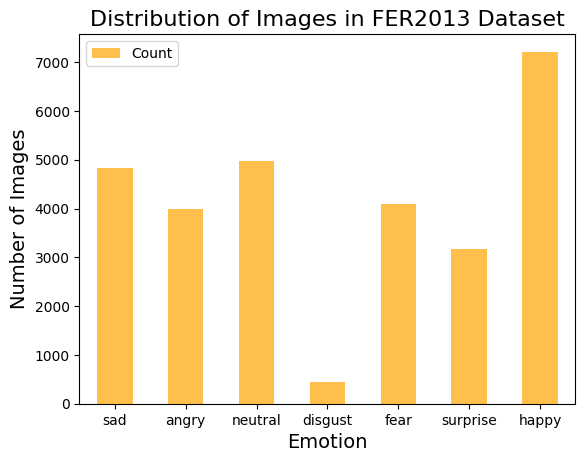

In [9]:
#Creating dictionary with emotion classes as keys and amount of images in each class as value
train_class_counts_fer2013 = {class_label: len(os.listdir(dirs)) for class_label, dirs in train_dirs_fer2013.items()}

# Convert dictionaries to DataFrames for easier plotting
train_counts_df = pd.DataFrame.from_dict(train_class_counts_fer2013, orient='index', columns=['Count'])

#plotting
train_counts_df.plot(kind='bar', stacked=True, color='orange', alpha=0.7)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Distribution of Images in FER2013 Dataset', fontsize=16)
plt.xticks(rotation=0)
plt.show()

We can see that we have an imbalnced dataset here also, with lake of images from class disgust.
Now let's combine the graphs to explore the whole data that I chose to use in the project.

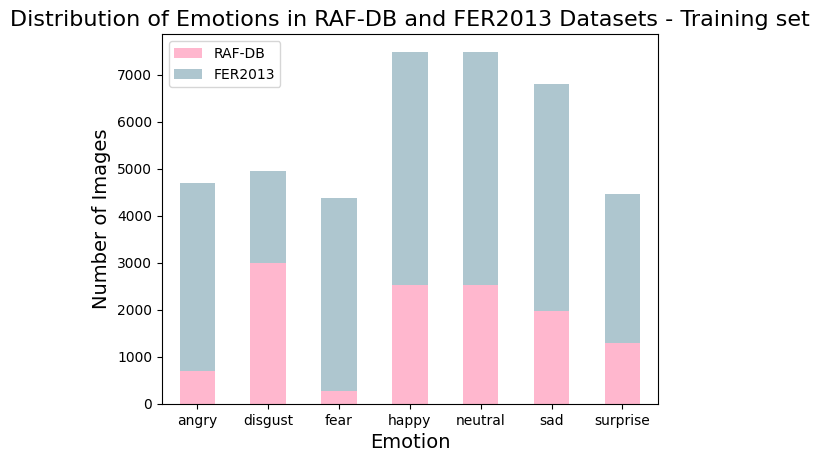

In [35]:
# Defining a function creates a bar plot comparing the counts of each emotion across both datasets.
def draw_distribution_of_both_datasets():
  train_class_counts_fer2013 = {class_label: len(os.listdir(dirs)) for class_label, dirs in train_dirs_fer2013.items()}
  train_counts_df_fer2013 = pd.DataFrame.from_dict(train_class_counts_fer2013, orient='index', columns=['Count'])

  train_class_counts_raf_db = {class_label: len(os.listdir(dirs)) for class_label, dirs in train_dirs_raf_db.items()}
  train_counts_df_raf_db = pd.DataFrame.from_dict(train_class_counts_raf_db, orient='index', columns=['Count'])

  # Combine RAF-DB and FER2013 counts into a single DataFrame
  combined_counts_train = pd.DataFrame({
      'RAF-DB': train_class_counts_raf_db,
      'FER2013': pd.Series(train_class_counts_fer2013)
  }).fillna(0)
  plt.close('all')

  combined_counts_train.plot(kind='bar', stacked=True, color=['#FFB7CE', '#AEC6CF'])
  plt.xlabel('Emotion', fontsize=14)
  plt.ylabel('Number of Images', fontsize=14)
  plt.title('Distribution of Emotions in RAF-DB and FER2013 Datasets - Training set', fontsize=16)
  plt.xticks(rotation=0)
  plt.show()


draw_distribution_of_both_datasets()

We can see that the combined datsets are extermly imbalanced. we have much more images that are under the label of 'happy' and fewer images under the label of 'disgust'.
The lake of images from class 'disgust' can cause poor performance in classifying this class and even overfitting and Models trained on imbalanced data may not generalize well to new data,
We will see what we can do about that.

Now, we’ll determine the number of grayscale and RGB images in both datasets. Understanding the image format is crucial because different models require specific input formats. Knowing whether the images are grayscale or RGB helps ensure that the data is compatible with the model’s requirements.

Number of grayscale images: 28709
Number of RGB images: 12271



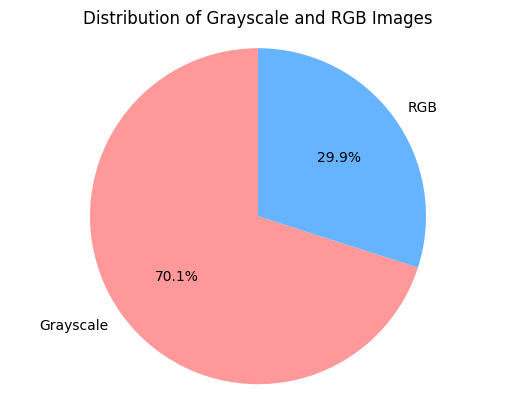

In [11]:
# defining a function that findes whether an image is grayscaled ot not
def is_grayscale(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    if len(img.shape) < 3:
      return True
    elif img.shape[2] == 1:
        return True
    else:
        return False

directories_raf_db = list(train_dirs_raf_db.values())
directories_fer2013 = list(train_dirs_fer2013.values())

all_directories=[directories_raf_db, directories_fer2013]

num_grayscale = 0
num_rgb = 0


for directory in all_directories:
  for dir in directory:
    for filename in os.listdir(dir):
          img_path = os.path.join(dir, filename)
          if is_grayscale(img_path):
                num_grayscale += 1
          else:
                num_rgb += 1

print(f"Number of grayscale images: {num_grayscale}")
print(f"Number of RGB images: {num_rgb}\n")


plt.pie([num_grayscale, num_rgb], colors = ['#ff9999','#66b3ff'], labels=['Grayscale', 'RGB'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Grayscale and RGB Images')
plt.show()

We observe a significantly higher number of grayscale images compared to RGB ones. This composition in the combined datasets, may not accurately reflect real-world scenarios. Our Models trained mainly on grayscale images might struggle to classify RGB images, which are more representative of real-world conditions, potentially posing a challenge in practical applications.

##Image dementions
Now we will investigate the dimensions of the images in the RAF-DB dataset. We already know that FER2013 is a scaled dataset with images resized to 48x48 pixels. I want to create a scatter plot to show the width and height of the images in the RAF-DB dataset. To do this, we will define a function that returns the dimensions of a single image.

In [12]:
def get_dimensions(file):
    img = Image.open(file)
    return img.size

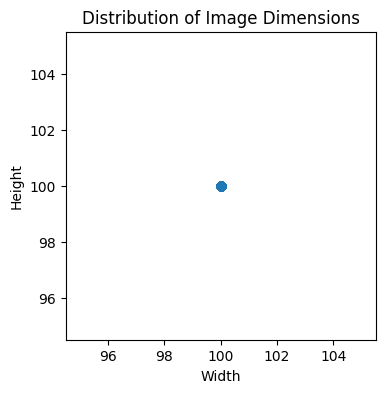


This dataset is scaled to: 100 X 100 dimentions


In [13]:
all_fils = []
file_list=[]
path=""
is_scaled= False


for class_label, directory in train_dirs_raf_db.items():
    file_list = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    for file in file_list:
      all_fils.append({'Class': class_label, 'File': file})

df_dimensions = pd.DataFrame(all_fils)

# The results are separated into width_dim and height_dim lists

width_dim, height_dim = zip(*df_dimensions['File'].map(get_dimensions))

#An indication of whether the lists we created have different numbers in them, which would mean different dimensions.
if len(set(width_dim))==1 and len(set(height_dim))==1:
  is_scaled = True

df_dimensions['Width'], df_dimensions['Height'] = width_dim, height_dim
plt.figure(figsize=(4, 4))
plt.scatter(df_dimensions['Width'], df_dimensions['Height'],  alpha=0.5)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()
if is_scaled:
  print('\nThis dataset is scaled to:',list(set(width_dim))[0],'X',list(set(height_dim))[0],'dimentions')


We can see that the data is scaled to 100x100 dimensions, otherwise, we would see more points distributed across different areas of the graph. This indicates that due to the differences between the two datasets, we will need to resize one of them to match the dimensions of the other during preprocessing. This step is necessary to ensure that the models perform as expected.


##Visualization
Let's visualize images from the datasets to see them in their original dimensions.

First, we will go through each directory in FER2013 and display one image from each category.


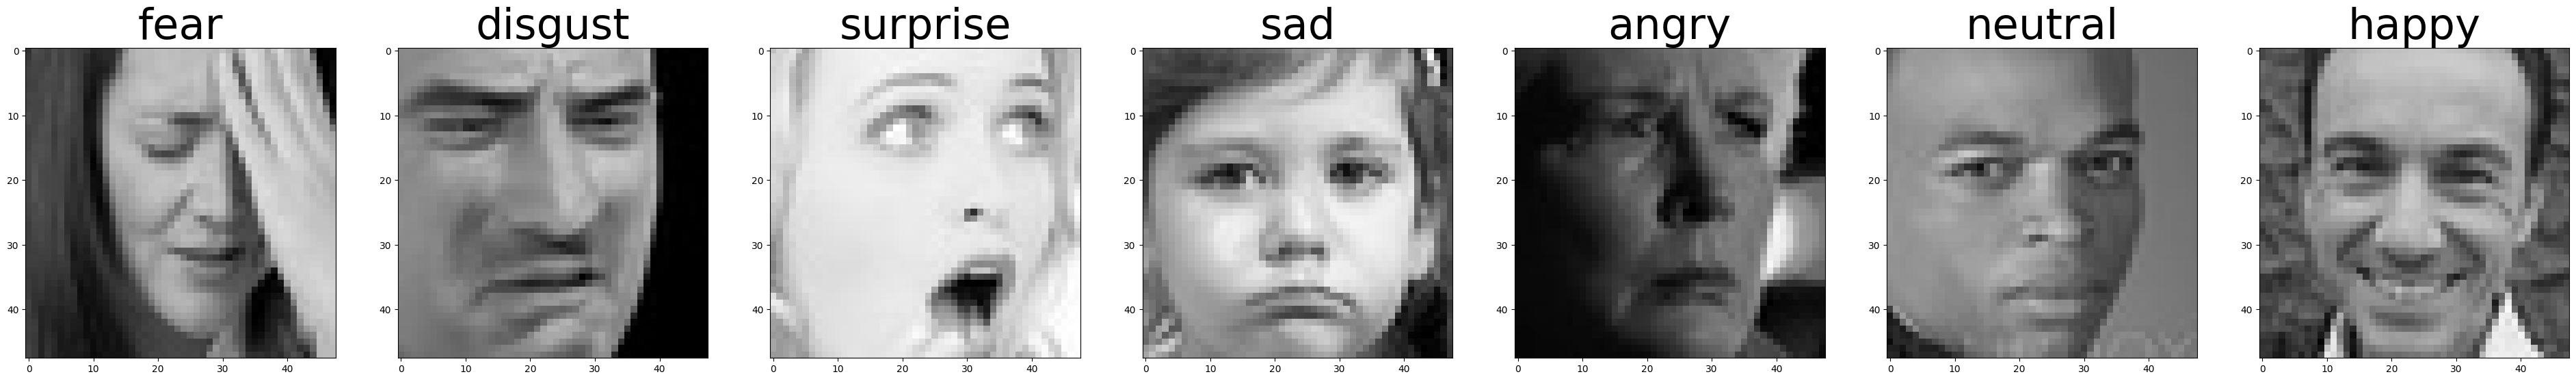

In [ ]:
plt.figure(figsize=(48,48))

for i,(emotion,path) in enumerate(train_dirs_fer2013.items(),1):
    img_path = os.path.join(path, os.listdir(path)[3])
    img = cv2.imread(img_path)
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(emotion, fontsize=45)

Here we can see that the images are indeed grayscale, as indicated in the datacard.

Now, let's examine the images in the RAF-DB dataset.

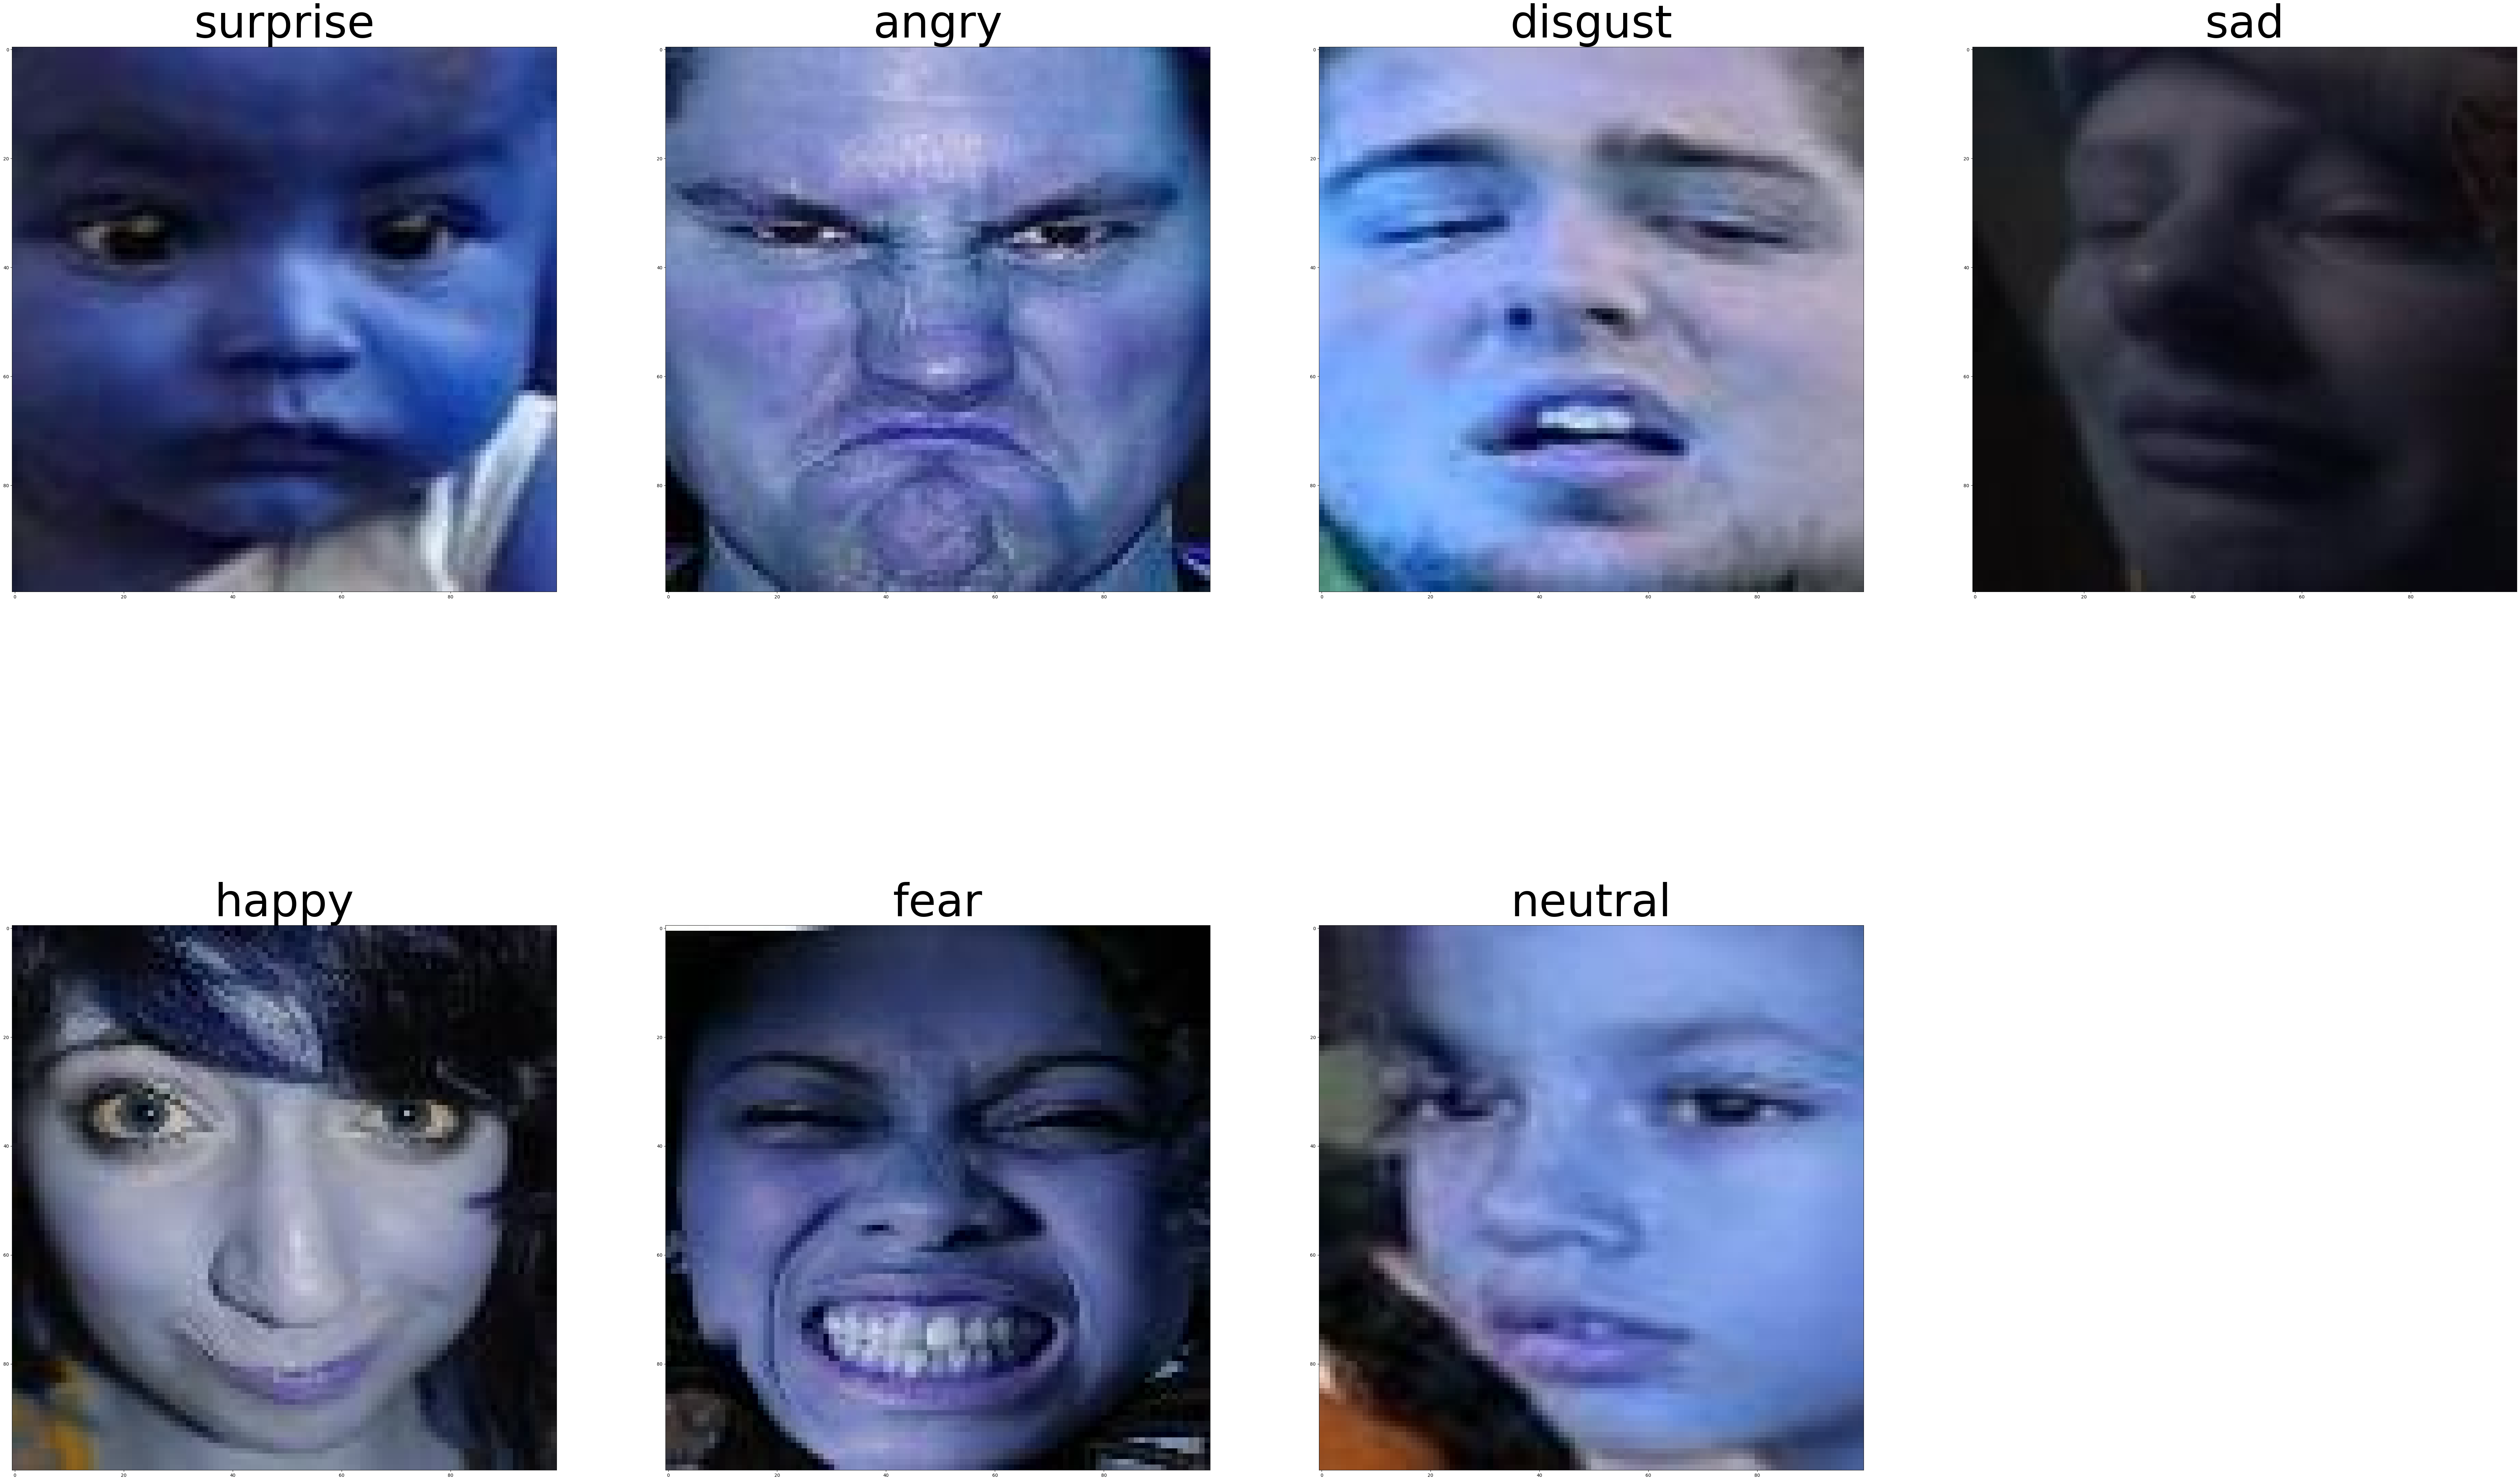

In [ ]:
plt.figure(figsize=(100,100))

for i,(emotion,path) in enumerate(train_dirs_raf_db.items(), 1):
    img_path = os.path.join(path, os.listdir(path)[1])
    img = cv2.imread(img_path)
    plt.subplot(3,4,i)
    plt.imshow(img)
    plt.title(emotion, fontsize=100)

These pictures could use a bit of a makeover, let’s fix up their colors and give them a fresh look.

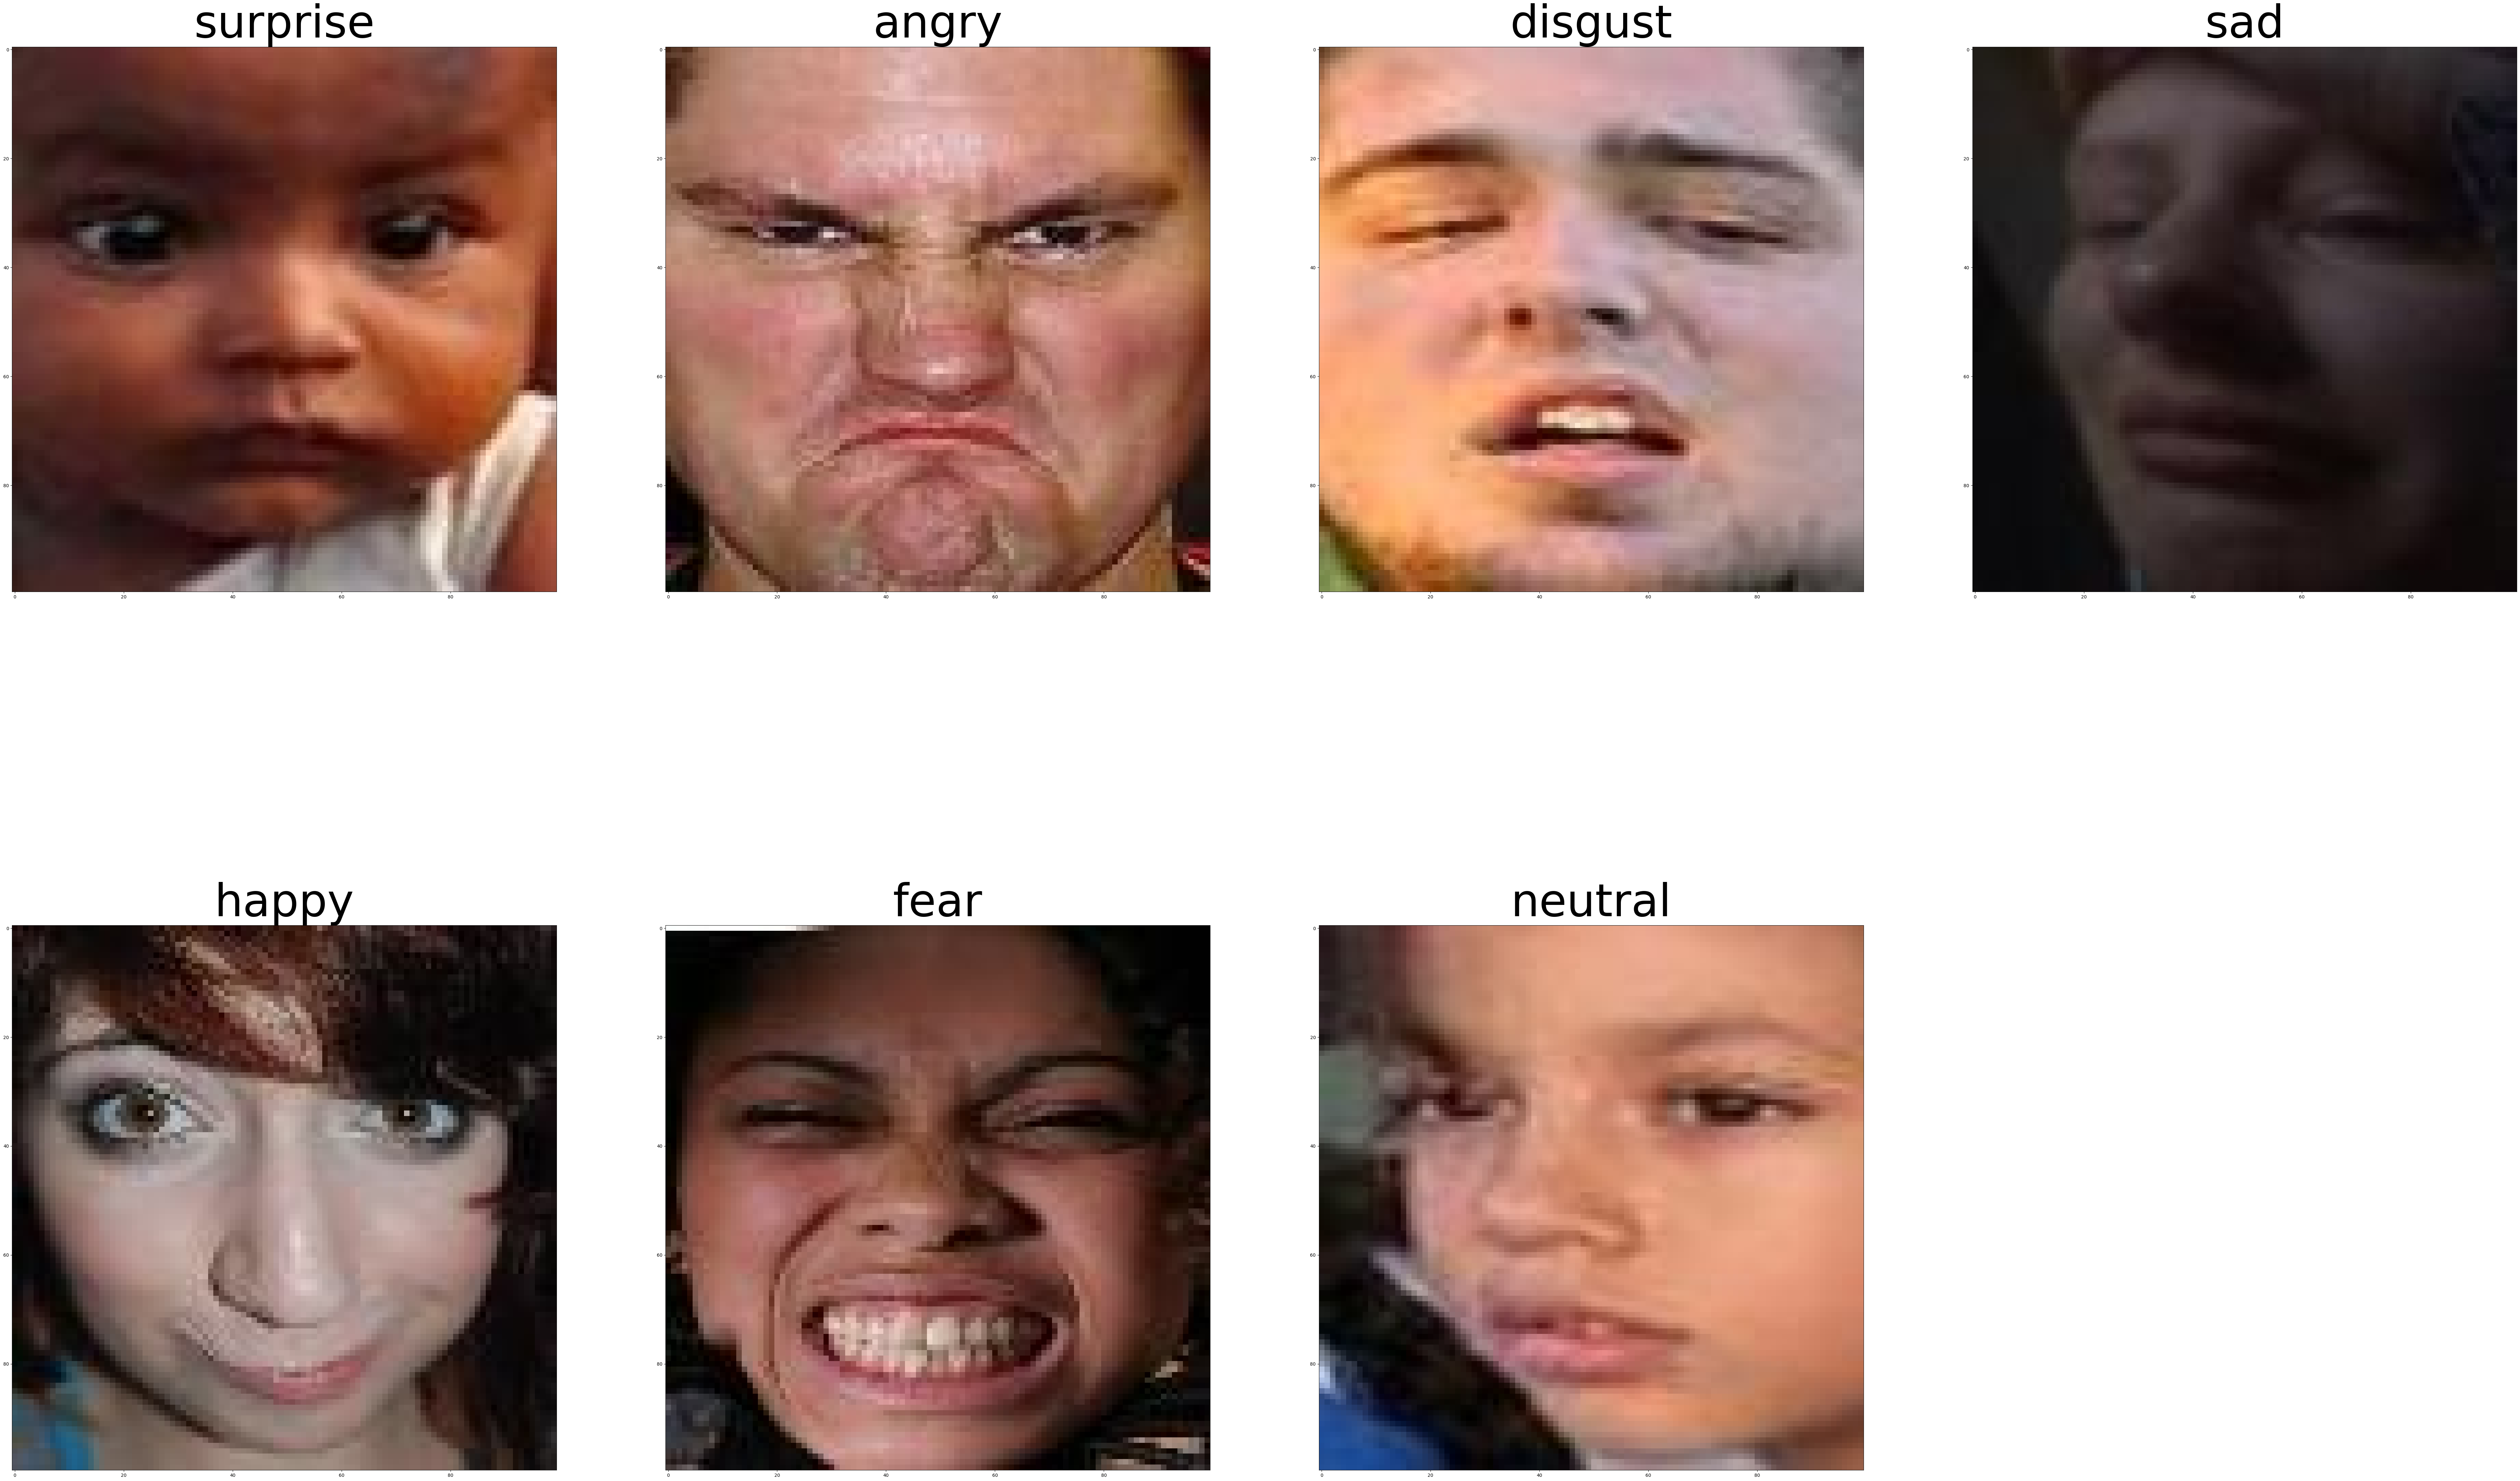

In [ ]:
plt.figure(figsize=(100,100))
for i,(emotion,path) in enumerate(train_dirs_raf_db.items(), 1):
    img_path = os.path.join(path, os.listdir(path)[1])
    img = cv2.imread(img_path)
    fixed_colors= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(3,4,i)
    plt.imshow(fixed_colors)
    plt.title(emotion, fontsize=100)

Ok that's much better.

We can see that this dataset includes colored images, which is beneficial as it adds diversity and may help the model capture details more effectively. However, both datasets do not have the most ideal resolution. While lower-resolution images reduce the amount of data to be processed, leading to faster computations and reduced processing time, this can be problematic in our case. Small details are sometimes crucial for accurately capturing emotions on people's faces.

##Histogram Analysis
Now I will explore the histogram of random images in the FER2013 dataset.

Investigating the histogram, which represents the distribution of pixel intensities in an image, is important because it helps assess image contrast, identify quality issues, and guide enhancements for better image processing.

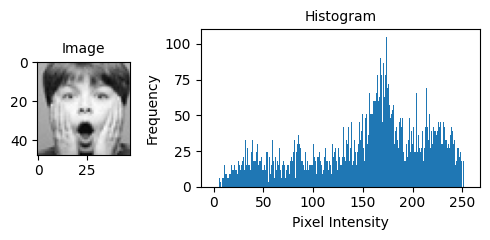

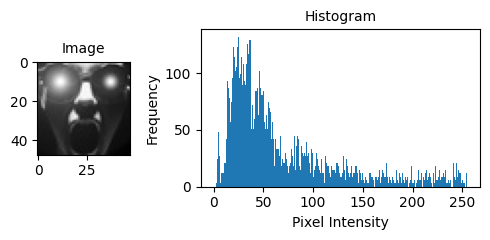

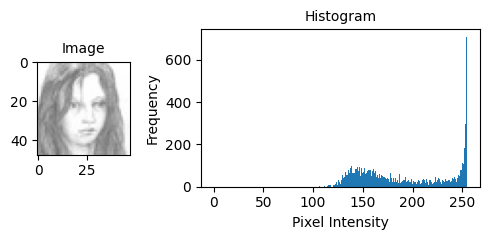

In [ ]:
random_emotions_path = random.sample(list(train_dirs_fer2013.values()), 3)
random_images=[]

#choose random images from random emotions
for emotion_path in random_emotions_path:
  specific_image = random.sample(os.listdir(emotion_path), 1)
  random_images.append(os.path.join(emotion_path, specific_image[0]))

def plot_histogram(image_path):
  img = cv2.imread(image_path)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.5), gridspec_kw={'width_ratios': [1, 3]})

  # Plot the image on the left subplot
  ax1.imshow(img, cmap='gray')
  ax1.set_title('Image', fontsize=10)

  # Plot the histogram on the right subplot
  ax2.hist(img.ravel(), bins=256, range=(0, 255))
  ax2.set_title('Histogram', fontsize=10)
  ax2.set_xlabel('Pixel Intensity')
  ax2.set_ylabel('Frequency')

  # Adjust layout and display the figure
  plt.tight_layout()
  plt.show()


for image in random_images:
  plot_histogram(image)

I ran these commands multiple times to sample more than three images per dataset, and I found out that not all of the pictures utilize the entire range of pixel intensity. This finding is significant because maximizing the use of this range enhances image detail and contrast.

For the other dataset (RAF-DB), since we plan to use colored images and not convert them to grayscale, this check is not relevant for considering whether histogram equalization techniques are needed during preprocessing

##EDA Conclutions
In our data observation, we found some issues that might be problematic for future stages and that we should pay attention to:
1. Our data is imbalanced (some classes have much more images than the others, and much more grayscaled images than RGB ones).
2. Each data set is scaled to different dimentions (FER2013-48X48, RAF-DB-100X100).
3.In FER2013 not all of the images utilize the entire range of pixel intensity.


#PREPROCESSING


I will use more preprocessing techniques across different models, but for now, I will focus on some basic preprocessing stages, which will be done right now.

In [15]:
import imghdr

##Cleaning data
I will remove images from both datasets that do not have the extensions 'jpeg', 'jpg' or 'png' so we can ensure that the data is clean.

In [16]:
image_extentions = ['jpg','jpeg', 'png']

for dir in all_image_dirs:
  for sub_dir in os.listdir(dir):
    for img in os.listdir(os.path.join(dir, sub_dir)):
      img_path = os.path.join(dir, sub_dir, img)
      try:
          file_extention = imghdr.what(img_path)
          if file_extention not in image_extentions:
                print(f'Removing Image: {img_path}')
                os.remove(img_path)
      except Exception as e:
            print(f'Issue with file {img_path}. Error: {e}')
            os.remove(img_path)

After we ensured that all files are with valid extentions, We will perform some preprocessing steps and save the processed data to disk. This approach ensures that these changes, such as resizing, are consistently applied.

##Resizing
First thing we'll do is resizing one dataset to the dimentions of the other, In order that the models we'll be able to process both of the datasets.
We have two options for resizing the images. The first option is to resize the FER2013 dataset to 100x100 pixels. This approach will consume a significant amount of computational resources and may require techniques to handle the reconstruction of missing pixels.
The second option is to resize the RAF-DB dataset to 48x48 pixels. In this approach, we might lose some details in the images that are crucial for the accuracy of the process, but the computational time will be significantly reduced.
We we'll choose for the begging the second option, if we will see that the accurary is very low we'll consider the first approch.

In [17]:
from tqdm import tqdm
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [18]:
def resize_image(image, size):
    resized_image = cv2.resize(image, size)
    return resized_image

In [19]:
def resize_images( input_directory, output_directory, size):
      if not os.path.exists(output_directory):
        os.makedirs(output_directory)

      for filename in tqdm(os.listdir(input_directory)):
          image_path = os.path.join(input_directory, filename)
          image = cv2.imread(image_path)
          processed_image = resize_image(image, (48,48))
          output_path = os.path.join(output_directory, filename)
          cv2.imwrite(output_path, processed_image)

for (dir_name, input_directory)  in train_dirs_raf_db.items():
  output_directory = '/content/RAF-DB/processed/train/'+dir_name
  resize_images(input_directory, output_directory, size=(48, 48))

for (dir_name, input_directory)  in test_dirs_raf_db.items():
  output_directory = '/content/RAF-DB/processed/test/'+dir_name
  resize_images(input_directory, output_directory, size=(48, 48))

100%|██████████| 162/162 [00:00<00:00, 3470.49it/s]


In [20]:
#update the new dirs
raf_train_dir = '/content/RAF-DB/processed/train'
raf_test_dir = '/content/RAF-DB/processed/test'

#FIRST MODEL- DECISION TREE CLASSIFIER
In my first model, I will use a decision tree classifier, which is a supervised learning algorithm. First, I will run the classifier with a maximum depth of 15 and observe the results.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_blobs
from sklearn.utils.class_weight import compute_class_weight

I will now define a function to process a dataset from each directory into two lists: one containing the flattened image data (formatted for model input) and the other containing the corresponding labels.

After defining the function, I will apply it to each directory.

In [52]:
def load_data(directory, size=(48, 48)):
    images = []
    labels = []
    for emotion in os.listdir(directory):
        emotion_dir = os.path.join(directory, emotion)
        if not os.path.isdir(emotion_dir):
            continue
        for filename in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image.flatten())
                labels.append(emotion)
    return images, labels

In [53]:
# Loading the data from each directory
X_train_fer, y_train_fer = load_data(fer2013_train_dir)
X_test_fer, y_test_fer = load_data(fer2013_test_dir)
X_train_raf, y_train_raf = load_data(raf_train_dir)
X_test_raf, y_test_raf = load_data(raf_test_dir)

In [54]:
#combining the training datasets
X_train_combined = X_train_fer + X_train_raf
y_train_combined = y_train_fer + y_train_raf

Now we will define and train the classifier.

In [ ]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=0,max_depth=15)
model.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier(max_depth=15, random_state=0)

In [ ]:
# Combining testing datasets
X_test_combined = X_test_fer + X_test_raf
y_test_combined = y_test_fer + y_test_raf

# Predict and evaluate
y_pred_combined = model.predict(X_test_combined)
accuracy_test = accuracy_score(y_test_combined, y_pred_combined)
print("Accuracy on Combined test:", accuracy_test)

Accuracy on Combined test: 0.34579348038258834


It seems that the performance of the classifier is quite low. I want to take a step back and observe the process before pruning the tree (by limiting the depth to 15).To do this, I will visualize the construction of the tree by gradually increasing the depth in increments of 5 and computing its accuracy each time.

fitting decision tree in max depth: 5
fitting decision tree in max depth: 10
fitting decision tree in max depth: 15
fitting decision tree in max depth: 20
fitting decision tree in max depth: 25
fitting decision tree in max depth: 30
fitting decision tree in max depth: 35
fitting decision tree in max depth: 40
fitting decision tree in max depth: 45
fitting decision tree in max depth: 50
fitting decision tree in max depth: 55


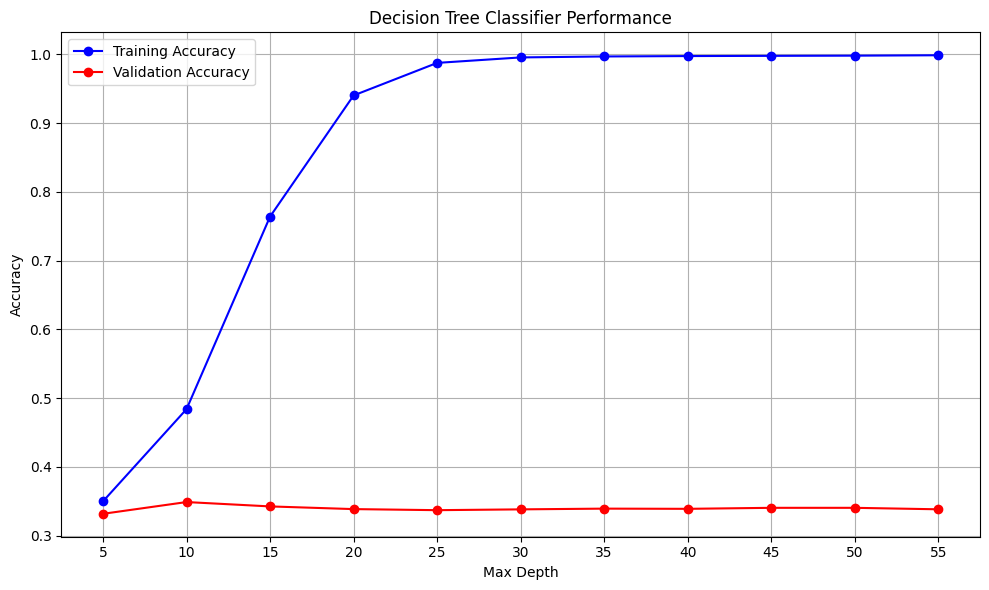

In [ ]:
max_depth_values =[5,10,15,20,25,30,35,40,45,50,55]
train_scores = []
val_scores = []
for max_depth in max_depth_values:
    print(f'fitting decision tree in max depth:', max_depth)
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    model.fit(X_train_combined, y_train_combined)

    train_score = model.score(X_train_combined, y_train_combined)
    train_scores.append(train_score)

    val_score = model.score(X_test_combined, y_test_combined)
    val_scores.append(val_score)

# Plotting the training and validation scores against model complexity
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(max_depth_values, val_scores, marker='o', label='Validation Accuracy', color='red')
plt.title('Decision Tree Classifier Performance')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the graph, it is evident that at a depth of 25, the decision tree achieves near-perfect classification on the training dataset, which might suggest overfitting. To address this, we will limit the depth of the decision tree to 22. Additionally, we will balance the class instances by assigning proportional weights to improve the results.

In [61]:
#Calculate the weights in order to adress the imbalanced dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_combined), y=y_train_combined)
class_weights_dict = {emotion: weight for emotion, weight in zip(np.unique(y_train_combined), class_weights)}

In [ ]:
model = DecisionTreeClassifier(random_state=0,max_depth=22, class_weight=class_weights_dict)
model.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier(class_weight={'angry': 1.2455927051671734,
                                     'disgust': 5.077437740056994,
                                     'fear': 1.3372055080597793,
                                     'happy': 0.4883862279374084,
                                     'neutral': 0.7817179482288309,
                                     'sad': 0.8594077678047144,
                                     'surprise': 1.3123258718416755},
                       max_depth=22, random_state=0)

In [ ]:
y_pred_combined = model.predict(X_test_combined)
accuracy_test = accuracy_score(y_test_combined, y_pred_combined)
print("Accuracy on Combined test:", accuracy_test)
print(classification_report(y_test_combined, y_pred_combined))

Accuracy on Combined test: 0.314854577396057
              precision    recall  f1-score   support

       angry       0.19      0.20      0.20      1120
     disgust       0.14      0.18      0.16       271
        fear       0.23      0.24      0.23      1098
       happy       0.45      0.44      0.44      2959
     neutral       0.29      0.27      0.28      1913
         sad       0.25      0.25      0.25      1725
    surprise       0.38      0.39      0.38      1160

    accuracy                           0.31     10246
   macro avg       0.27      0.28      0.28     10246
weighted avg       0.32      0.31      0.32     10246



We can see that our accuracy is still quite low, despite our efforts to prune the tree and balance the classes for better accuracy and to prevent overfitting. Let's try using the RandomForestClassifier to see if it helps address the overfitting issue.

#SECOND MODEL- RANDOM FOREST CLASSIFIER

In this model, I will build a RandomForestClassifier, which is an ensemble learning method that combines multiple decision trees to improve classification performance.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
X_test_combined = X_test_fer + X_test_raf
y_test_combined = y_test_fer + y_test_raf

Now I will define and train the classifier.

In [57]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

random_forest_classifier.fit(X_train_combined, y_train_combined)
y_pred = random_forest_classifier.predict(X_test_combined)
# Calculate accuracy
accuracy = accuracy_score(y_test_combined, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.42680070271325393


I will define a function to draw a confusion matrix, which will help us observe the accuracy of the classifier for each emotion class.

In [112]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(y_test_combined,y_pred):
  plt.figure(figsize=(4, 4))
  class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
  sns.heatmap(confusion_matrix(y_test_combined, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

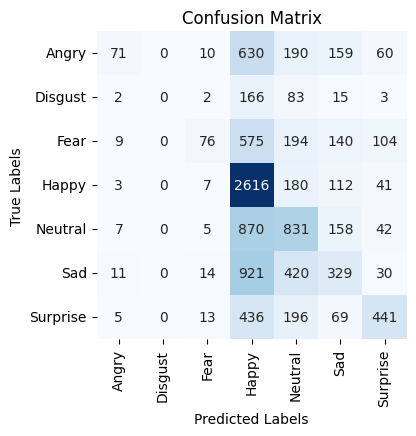

In [ ]:
draw_confusion_matrix(y_test_combined,y_pred)

We can tell that the accuracy has improved slightly, but it's still not quite satisfactory.


We can see that almost everyone appears happy, but as we know from both the real world and our dataset, this isn't quite the true picture.

Now I want to also try using the class_weight parameter because it performed poorly overall, particularly with the 'disgust' class where it failed to label any instances.

In [62]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, class_weight=class_weights_dict)

random_forest_classifier.fit(X_train_combined, y_train_combined)
y_pred = random_forest_classifier.predict(X_test_combined)

accuracy = accuracy_score(y_test_combined, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.3756587936755807


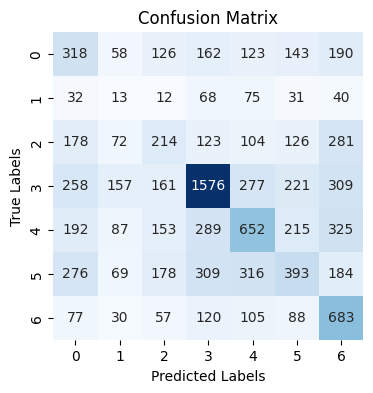

In [63]:
draw_confusion_matrix(y_test_combined,y_pred)

Although this approach improved the classification of less frequently appearing classes like 'Disgust' and 'Surprise,' it significantly reduced the accuracy of classifying instances as 'Happy,' as well as the overall accuracy.

The results with these classifiers were not particularly successful. Let's now explore a well-known architecture in the field of facial emotion recognition: Convolutional Neural Networks (CNNs).

#DATA AUGMENTATION AND DATASET BALANCING

Before implementing the CNN models, I want to balance the dataset by applying data augmentation to the 'disgust' class and undersampling the 'happy' class.

First, we will focus on the 'disgust' class. I will use ImageDataGenerator to generate augmented images specifically for this class and save them to a designated directory, replacing the existing data with the augmented images.

I chose this approach to ensure that data augmentation is applied to a specific directory, which makes it easier to manage and organize the data according to my needs. While ImageDataGenerator can augment data with various parameters, it does not facilitate augmenting data within specific directories directly, which is why I am preprocessing the data this way.

In [21]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.image as mpimg
import shutil

Before augmenting the directory, I will first visualize how the augmented images will look using simple augmentation techniques such as rotation, flipping, zooming, and brightness adjustment. I will generate and save examples of these augmentations in a separate directory, which I will delete afterward.

In [22]:
save_aug_dir_fer2013 = '/content/FER2013/agumented_images'
save_aug_dir_raf_db = '/content/RAF-DB/agumented_images'

# Make directories for saving augmented images
disgust_save_dir_fer2013 = os.path.join(save_aug_dir_fer2013, 'disgust')
disgust_save_dir_raf_db = os.path.join(save_aug_dir_raf_db, 'disgust')

aug_img = '/content/aug_img'

# happy_save_dir = os.path.join(save_aug_dir, 'happy')
os.makedirs(aug_img, exist_ok=True)
os.makedirs(disgust_save_dir_fer2013, exist_ok=True)
os.makedirs(disgust_save_dir_raf_db, exist_ok=True)
# os.makedirs(happy_save_dir, exist_ok=True)

In [23]:
# Augmentation process
datagen = ImageDataGenerator(
        rotation_range = 40,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

I will define a function that augments each image five times, where each augmented image is a variation created by combining different augmentation parameters.

In [24]:
def augmented_images(img_arr,dest_dir,origin_dir):
  i = 0
  for batch in datagen.flow(
      img_arr,
      batch_size=1,
      save_to_dir=dest_dir,
      save_prefix='Augmented_image'+origin_dir):
      i += 1
      if i > 4: # create 5 augmented images
          break

In [25]:
img_arr = img_to_array(cv2.imread('/content/FER2013/test/angry/PrivateTest_28463343.jpg'))
img_arr = img_arr.reshape((1,) + img_arr.shape)

augmented_images(img_arr, aug_img,'_fer2013')

Now let's visualize the images we created.

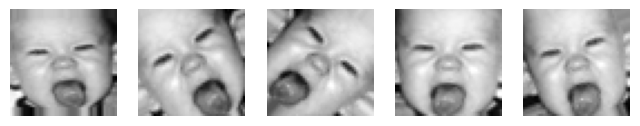

In [26]:
plt.figure(figsize=(8,8))

for i, img_path in enumerate(os.listdir(aug_img),1):
    img = cv2.imread(os.path.join(aug_img, img_path))
    plt.subplot(1,5,i)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Looks nice! Now that we've seen an example of how it works with the data, we'll implement the augmentation for the 'Disgust' class and save it in a new directory for further processing.

In [27]:
for img_path in os.listdir(train_dirs_fer2013['disgust']):
  img_arr = img_to_array(cv2.imread(os.path.join(train_dirs_fer2013['disgust'],img_path)))
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  augmented_images(img_arr,disgust_save_dir_fer2013, '_fer2013')

for img_path in os.listdir(train_dirs_raf_db['disgust']):
  img_arr = img_to_array(cv2.imread(os.path.join(train_dirs_raf_db['disgust'],img_path)))
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  augmented_images(img_arr, disgust_save_dir_raf_db,'_raf_db')


In [28]:
shutil.rmtree('/content/aug_img')

After creating the two new augmented directories, I want to remove the unnecessary directories and replace them with the new ones.

In [29]:
 shutil.rmtree(train_dirs_fer2013['disgust'])
 shutil.rmtree(train_dirs_raf_db['disgust'])


In [30]:
shutil.move(disgust_save_dir_fer2013, fer2013_train_dir)
shutil.move(disgust_save_dir_raf_db, raf_db_train_set_path)

'/content/RAF-DB/DATASET/train/disgust'

Great! Now that we have a new directory with augmented data, we will address the number of images in the 'happy' class by undersampling it. I would like the 'happy' class to have the same number of images as the 'neutral' class, since the 'neutral' class is the largest class after 'happy'. First, we will perform some calculations to determine the required number of images. Then, I'll define a function to handle the undersampling.

In [31]:
#calculating the ratio between the classes in both datasets
ratio_fer2013 = len(os.listdir(train_dirs_fer2013['neutral']))/len(os.listdir(train_dirs_fer2013['happy']))
ratio_raf_db = len(os.listdir(train_dirs_raf_db['neutral']))/len(os.listdir(train_dirs_raf_db['happy']))

In [32]:
def undersample(source_dir, target_ratio):
    files = os.listdir(source_dir)
    num_to_move =len(files)-int(len(files) * target_ratio)
    files_to_move = random.sample(files, num_to_move)
    for file in files_to_move:
      src = os.path.join(source_dir, file)
      os.remove(src)

In [33]:
undersample(train_dirs_fer2013['happy'], target_ratio=ratio_fer2013)
undersample(train_dirs_raf_db['happy'], target_ratio=ratio_raf_db)

Now let's visualize the datasets after the balancing process i've made

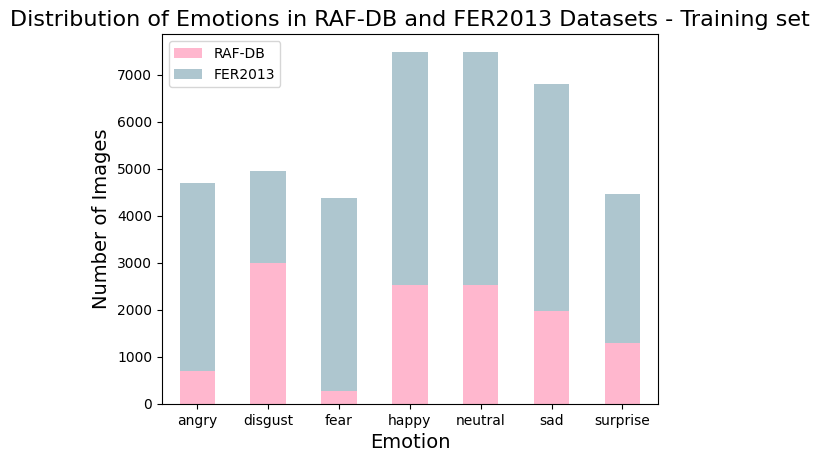

In [36]:
draw_distribution_of_both_datasets()

It's not perfectly balanced, but it's much better than what we had before. If we'll observe low performance, we will consider making additional adjustments.

Now that the data is almost ready, I want to combine the datasets into one unified directory for easier access.

In [37]:
def combine_datasets(source_dirs, target_dir):
    for source_dir in source_dirs:
        for root, dirs, files in os.walk(source_dir):
            for file in files:
                # Constructing the source and target file paths
                source_file = os.path.join(root, file)
                target_file = os.path.join(target_dir, os.path.relpath(source_file, source_dir))
                # Create directory if it doesn't exist
                os.makedirs(os.path.dirname(target_file), exist_ok=True)
                # Copy the file
                shutil.copyfile(source_file, target_file)


source_dirs = ['/content/FER2013', '/content/RAF-DB/DATASET']
target_dir = '/content/combined-datasets'

combine_datasets(source_dirs, target_dir)

That was quite a Sisyphean task, but now that the data is perfectly ready to use, let’s hope it was worth the effort!

#THIRD MODEL- CNN

For the first CNN model, I will take inspiration from an [article](https://ir.vignan.ac.in/id/eprint/642/1/4.Dr.NVN%20FERNet.pdf) I read where the CNN architecture is organized into blocks, with each block containing several layers, including Conv2D, BatchNormalization, MaxPooling2D, and Dropout. BatchNormalization will help stabilize and accelerate training by normalizing the inputs to each layer, while Dropout reduces overfitting by randomly dropping neurons out of the network during training, which forces the remaining neurons to learn more robust features.
I used the Adam optimizer because it adapts the learning rate for each parameter, which improves convergence speed and efficiency


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [37]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

Let's see the summary of the CNN that was built.

In [38]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 64)        2

Now I will proceed to the training process. I will use ImageDataGenerator since I find it user-friendly. The input to the model will be 48x48 images, which will be rescaled to the [0,1] range to normalize the pixel values for making it easier for neural networks model to learn.

 The model will receive input images with 3 channels (RGB), I will address the issue of images with fewer channels by using the parameter `color_mode='rgb'`.

 The images will be fed to the model in batches of 32 images per batch. Additionally, I will split the training dataset into training and validation sets to monitor the model's performance and try to avoid overfitting. To further prevent overfitting and ensure the model generalizes well, I will use EarlyStopping with the parameters `monitor='val_loss'`, `patience=10`, and `restore_best_weights=True`. This setup will stop training if the validation loss does not improve for 10 consecutive epochs and restore the model weights from the epoch with the best validation loss.

In [39]:
NUM_CLASSES = 7
IMAGE_WIDTH, IMAGE_HEIGHT = 48, 48
BATCH_SIZE = 32

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [40]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_dir = '/content/combined-datasets/train'
test_dir = '/content/combined-datasets/test'
training_data_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size= BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='training')


Found 32224 images belonging to 7 classes.


In [41]:
validation_data_generator  = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation')

Found 8052 images belonging to 7 classes.


In [42]:
test_data_generator  = data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')

Found 10246 images belonging to 7 classes.


In [43]:
history = model.fit(
    training_data_generator,
    epochs=50,
    validation_data=validation_data_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
1009/1009 [==============================] - 25s 17ms/step - loss: 1.7111 - accuracy: 0.3677 - val_loss: 1.5563 - val_accuracy: 0.4122
Epoch 2/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.3501 - accuracy: 0.4883 - val_loss: 1.4501 - val_accuracy: 0.4578
Epoch 3/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.2478 - accuracy: 0.5261 - val_loss: 1.2981 - val_accuracy: 0.5150
Epoch 4/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.1909 - accuracy: 0.5477 - val_loss: 1.5862 - val_accuracy: 0.4511
Epoch 5/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.1523 - accuracy: 0.5634 - val_loss: 1.3623 - val_accuracy: 0.4958
Epoch 6/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.1192 - accuracy: 0.5782 - val_loss: 1.3744 - val_accuracy: 0.4924
Epoch 7/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.0922 - accuracy: 0.5882 - val_loss: 1.3220 -

I will save it to Google Drive for further processing in case the runtime ends.

In [ ]:
from google.colab import drive
import json

drive.mount('/content/drive')
history_dict = history.history
history_path = '/content/drive/My Drive/history_cnn_model.json'
with open(history_path, 'w') as f:
    json.dump(history_dict, f)

model_path = '/content/drive/My Drive/cnn_model.h5'
model.save(model_path)

Now let’s test its accuracy on the test set.

In [45]:
test_loss, test_accu = model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 4s 12ms/step - loss: 1.0853 - accuracy: 0.6444
final test accuracy = 64.44


It already seems better than what we observed in the previous models. Let's explore the training process further and gain deeper accuracy insights using the confusion matrix.

In [46]:
from tensorflow.keras.models import load_model
import json
model_path = '/content/drive/My Drive/cnn_model.h5'
loaded_model = load_model(model_path)

# Load the training history
history_path =  '/content/drive/My Drive/history_cnn_model.json'
with open(history_path, 'r') as f:
    loaded_history_dict = json.load(f)

I will define a function that plots two graphs: the first one represents the accuracy during the epochs of both the training and validation sets, and the second one represents the loss function values during the epochs for both the training and validation sets.

In [49]:
def plot_history(history):
    fig, axis = plt.subplots(1, 2, figsize=(20,10))

    # Plot accuracy
    axis[0].plot(history['accuracy'])
    axis[0].plot(history['val_accuracy'])
    axis[0].set_title('Accuracy')
    axis[0].set_xlabel('Epochs')
    axis[0].set_ylabel('Accuracy')
    axis[0].legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    axis[1].plot(history['loss'])
    axis[1].plot(history['val_loss'])
    axis[1].set_title('Loss')
    axis[1].set_xlabel('Epochs')
    axis[1].set_ylabel('Loss')
    axis[1].legend(['Train', 'Validation'], loc='upper right')

    plt.show()


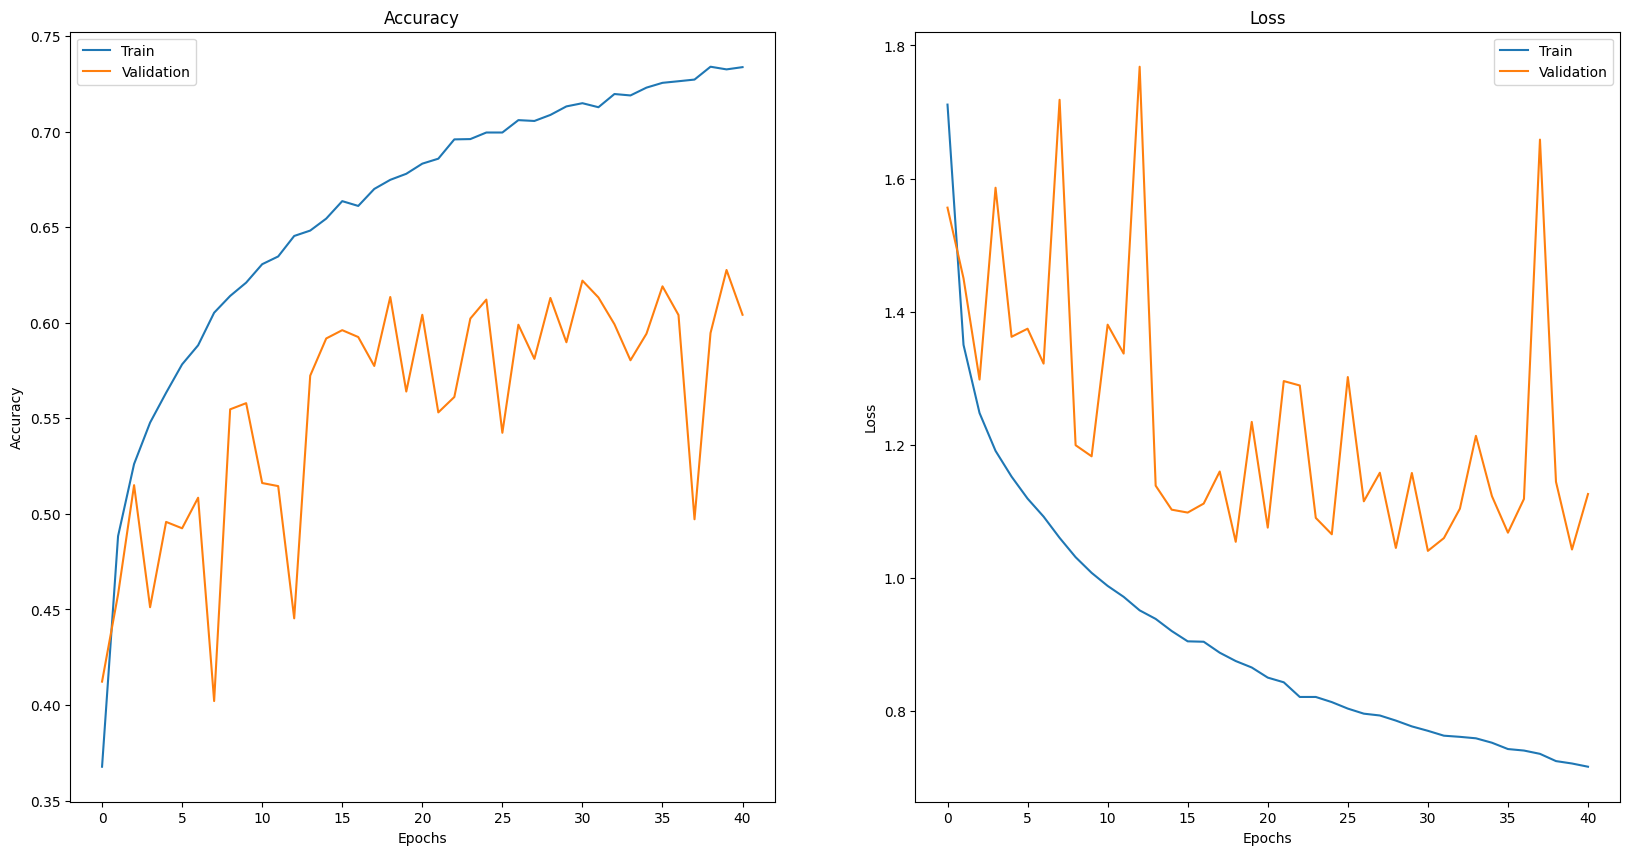

In [50]:
plot_history(loaded_history_dict)

In [48]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(y_test_combined,y_pred, class_labels):
  plt.figure(figsize=(4, 4))
  class_labels = class_labels
  sns.heatmap(confusion_matrix(y_test_combined, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

Now let's see the confution matrix:

321/321 [==============================] - 4s 12ms/step


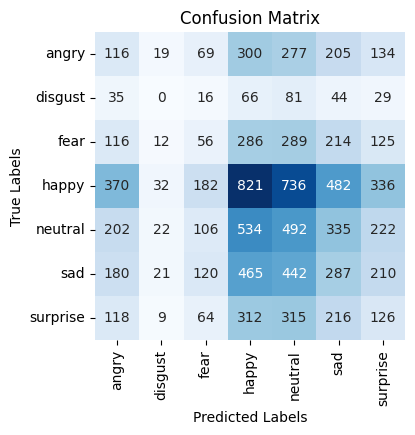

In [52]:
classes = test_data_generator.classes
predicted_classes = np.argmax(loaded_model.predict(test_data_generator), axis=1)
class_labels = list(test_data_generator.class_indices.keys())
draw_confusion_matrix(classes, predicted_classes, class_labels)

The model performed better than the previous ones, effectively classifying instances from the 'Happy' and 'Neutral' classes. However, the validation accuracy and validation loss scores were quite volatile, which could be attributed to factors such as a small validation set or a high learning rate.

A higher score on the validation set compared to the training set suggests that the model may have overfitted.

Let’s try a different model.

#FORTH MODEL- RESNET50V2


Now I will use one of the most classic CNN models, ResNet50, and benefit from applying transfer learning techniques.
Leveraging transfer learning technique involves using the weights of a model trained on one dataset for another dataset. Training models from scratch on each dataset can be highly inefficient. Instead, by applying knowledge gained from a similar task to the new data, the training process can be significantly more efficiant.
I will use the weights from ImageNet, a large-scale dataset containing over 14 million images classified into more than 20,000 categories, to leverage a pre-trained model for the classification task.




In [85]:
import matplotlib
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.models import load_model

I will use 'ImageDataGenerator' to rescale the data and split the training dataset into training and validation sets as done previously. Since ResNet50V2 expects images of size 224x224, I will set the target size to these dimensions.

The model utilizes the ResNet50V2 base with `include_top=False` to exclude the original fully connected layers.
I'll add a GlobalAveragePooling2D layer to reduce the feature map dimensions. Next, a Dense layer with 1024 units and ReLU activation that will capture complex features.
The final Dense layer, with 7 neurons (corresponding to the number of classes) and a softmax activation function, which converts the outputs into probabilities. The class with the highest probability will be the model's prediction

In [86]:
NUM_CLASSES = 7
IMAGE_WIDTH, IMAGE_HEIGHT = 224, 224
BATCH_SIZE = 32

In [87]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_dir = '/content/combined-datasets/train'
test_dir = '/content/combined-datasets/test'
training_data_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size= BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='training')


Found 32244 images belonging to 7 classes.


In [88]:
validation_data_generator  = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation')

Found 8057 images belonging to 7 classes.


In [89]:
test_data_generator  = data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')


Found 10246 images belonging to 7 classes.


In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

modified_model = base_model.output
modified_model = GlobalAveragePooling2D()(modified_model)
modified_model = Dense(1024, activation='relu')(modified_model)
modified_model = Dense(NUM_CLASSES, activation='softmax')(modified_model)

model = Model(inputs=base_model.input, outputs=modified_model)
model.trainable = True
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=3,
    verbose=1,
    mode='max',
    baseline=1.0,
    restore_best_weights=True
)



Now, let's fit the model.

In [ ]:
history = model.fit(
    training_data_generator,
    steps_per_epoch=training_data_generator.samples // BATCH_SIZE,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.samples // BATCH_SIZE,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
1007/1007 [==============================] - 89s 66ms/step - loss: 1.3105 - accuracy: 0.4914 - val_loss: 1.5967 - val_accuracy: 0.4221
Epoch 2/20
1007/1007 [==============================] - 65s 64ms/step - loss: 1.0118 - accuracy: 0.6161 - val_loss: 1.4724 - val_accuracy: 0.4636
Epoch 3/20
1007/1007 [==============================] - 64s 64ms/step - loss: 0.8784 - accuracy: 0.6676 - val_loss: 1.1960 - val_accuracy: 0.5548
Epoch 4/20
1007/1007 [==============================] - 63s 63ms/step - loss: 0.7824 - accuracy: 0.7054 - val_loss: 1.0367 - val_accuracy: 0.6127
Epoch 5/20
1007/1007 [==============================] - 64s 64ms/step - loss: 0.6927 - accuracy: 0.7400 - val_loss: 1.0569 - val_accuracy: 0.6087
Epoch 6/20
1007/1007 [==============================] - 63s 63ms/step - loss: 0.5976 - accuracy: 0.7766 - val_loss: 1.2393 - val_accuracy: 0.5691
Epoch 7/20
1007/1007 [==============================] - 65s 65ms/step - loss: 0.4894 - accuracy: 0.8206 - val_loss: 1.1855 -

We can see that it restored the best weights from the 19th epoch. Now let's examine the performance of the model. However, since this model took a lot of time to train, I'm saving it to Google Drive to ensure it isn't erased by mistake or due to runtime ending.

In [ ]:
from google.colab import drive
import json

drive.mount('/content/drive')
history_dict = history.history
history_path = '/content/drive/My Drive/training_history.json'
with open(history_path, 'w') as f:
    json.dump(history_dict, f)

model_path = '/content/drive/My Drive/resnet50_modified_model.h5'
model.save(model_path)


Now let's test the accuracy of the model:

In [ ]:
test_loss, test_accu = model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 12s 37ms/step - loss: 2.1038 - accuracy: 0.6422
final test accuracy = 64.22


We will load the model from Google Drive to analyze its performance

In [99]:
from tensorflow.keras.models import load_model
import json
model_path = '/content/drive/My Drive/resnet50_modified_model.h5'
loaded_model = load_model(model_path)

# Load the training history
history_path =  '/content/drive/My Drive/training_history.json'
with open(history_path, 'r') as f:
    loaded_history_dict = json.load(f)

In [100]:
test_loss, test_accu = loaded_model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 12s 34ms/step - loss: 2.1038 - accuracy: 0.6422
final test accuracy = 64.22


Okay, that looks similar in performance to the CNN model we saw before. Now, I will visualize the history and the confusion matrix for better insights.

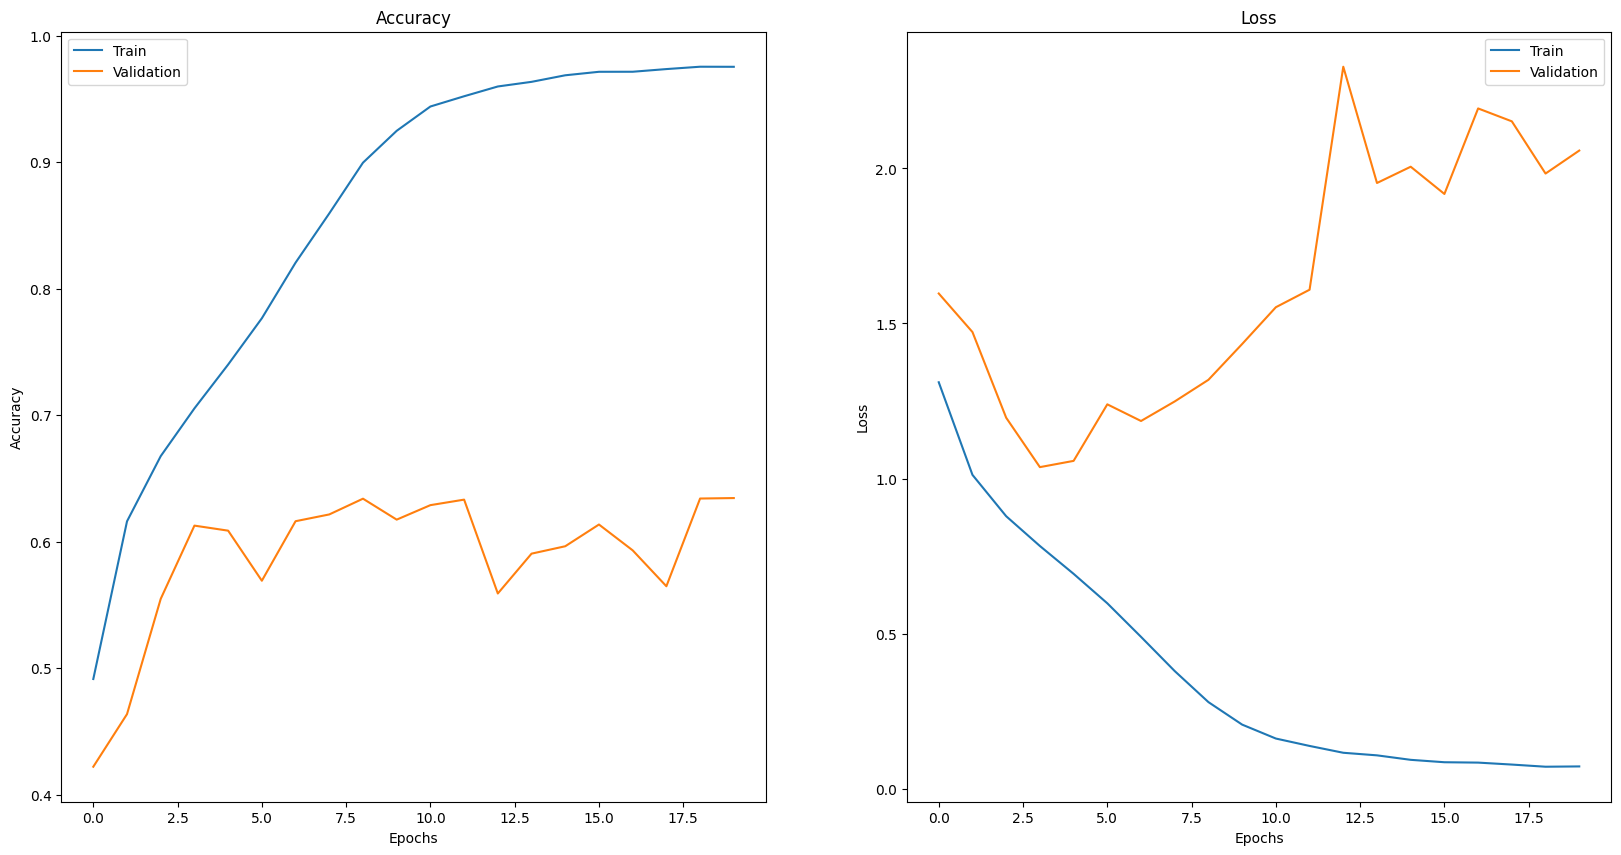

In [101]:
plot_history(loaded_history_dict)

I can see that since the third epoch, the accuracy of the model on the training set has been increasing steadily, while the accuracy on the validation set varies but more stable than the last nodel. As the loss decreases on the training set but increases on the validation set, this might indicate that the model is overfitting.
Let's examin the confusion matrix of the performance of the model.

321/321 [==============================] - 12s 33ms/step


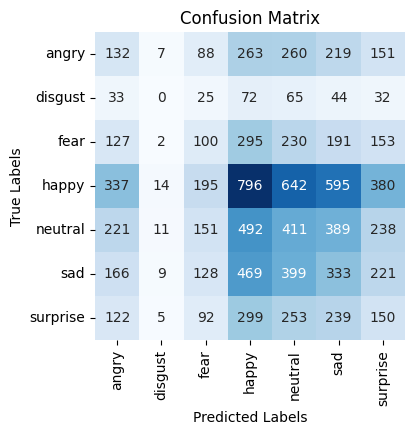

In [102]:
classes = test_data_generator.classes
predicted_classes = np.argmax(loaded_model.predict(test_data_generator, steps=np.ceil(test_data_generator.samples/test_data_generator.batch_size)), axis=1)
class_labels = list(test_data_generator.class_indices.keys())
cm = draw_confusion_matrix(classes, predicted_classes, class_labels)

We can see that the model performed well at predicting the 'happy' class, as indicated by the diagonal cell for this class being dark blue. The performance on the 'neutral' and 'sad' classes also appears relatively good. However, the model's performance on the other classes is not very impressive.

Let's try to improve our last model by adding a preprocessing stage to enhance image resolution before feeding them into the model. Additionally, we will add two dropout layers to the modified architecture in an attempt to reduce overfitting.

#FIFTH MODEL-SUPER RESOLUTION+RESNET50V2

An [article](https://ieeexplore.ieee.org/document/9631205?denied=) I read on advancements in Facial Emotion Recognition (FER) suggests using a preprocessing technique called Super-Resolution to improve model accuracy.

According to this article, the purpose of the super-resolution technique is to convert a low-resolution image into a high-resolution image, enhancing visual quality and detail beyond the original coarse features.

It's important to note that, in our mission, capturing small details in the faces within the images is crucial for identifying important features for classification, such as wrinkles and other fine facial expressions.


I thought it would be interesting to investigate the effect of combining super-resolution with the ResNet50v2 model we saw before to see whether it improves performance.

I read about a super-resolution techniques that uses deep convolutional neural networks to recover high-resolution (HR) images from low-resolution (LR) ones. One such technique is called ESRGAN (Enhanced SRGAN),This technique is capable of generating realistic textures during single image super-resolution.
I plan to use ESRGAN for this purpose.


I took the [code](https://www.tensorflow.org/hub/tutorials/image_enhancing?hl=he) from the TensorFlow explanations that use ESRGAN and modified it to suit my needs.


In [108]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [109]:
def preprocess_image(image):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  if image.shape[-1] == 4:
    image = image[...,:-1]

  if image.shape[-1] == 1:
    image = tf.image.grayscale_to_rgb(image)

  hr_image = tf.cast(image, tf.float32)
  return tf.expand_dims(hr_image, 0)

In [110]:
%matplotlib inline
def plot_image(image_1,image_2):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image_1 = tf.squeeze(image_1)
  image_2 = tf.squeeze(image_2)
  image_1 = np.asarray(image_1)
  image_2 = np.asarray(image_2)
  image_1 = tf.clip_by_value(image_1, 0, 255)
  image_2 = tf.clip_by_value(image_2, 0, 255)
  image_1 = Image.fromarray(tf.cast(image_1, tf.uint8).numpy())
  image_2 = Image.fromarray(tf.cast(image_2, tf.uint8).numpy())


  plt.figure(figsize=(6,6))

  plt.subplot(1, 2, 1)
  plt.imshow(image_1)
  plt.title('Original image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(image_2)
  plt.title('High resolution image')
  plt.axis('off')

In [112]:
# Declaring Constants
IMAGE_PATH = "/content/FER2013/train/neutral/Training_10059941.jpg"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [113]:
model_super_res = hub.load(SAVED_MODEL_PATH)

Downloaded https://tfhub.dev/captain-pool/esrgan-tf2/1, Total size: 20.60MB



Before applying this preprocessing technique to all images, I want to visualize its effect. To do this, I have randomly selected an image to apply the technique and observe the results.

In [115]:
hr_image = tf.image.decode_image(tf.io.read_file(IMAGE_PATH))
hr_image = preprocess_image(hr_image)

In [116]:
fake_image = model_super_res(hr_image)
fake_image = tf.squeeze(fake_image)

In [117]:
def high_resolution(image):
    hr_image = preprocess_image(image)
    processed_image = model_super_res(hr_image)
    processed_image = tf.image.resize(processed_image, size=(224, 224))
    return processed_image



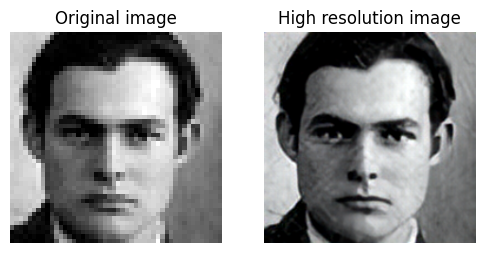

In [ ]:
img = tf.image.decode_image(tf.io.read_file(IMAGE_PATH))
plot_image(hr_image, high_resolution(img))

Looks good! Now let's build a model similar to the previous one, with two key differences: we will add dropout layers to the modified top of the network to address overfitting and apply high-resolution preprocessing.

In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Adding custom layers on top of the base model
modified_model = base_model.output
modified_model = GlobalAveragePooling2D()(modified_model)
modified_model = Dropout(0.25)(modified_model)  # Add Dropout layer
modified_model = Dense(1024, activation='relu')(modified_model)
modified_model = Dropout(0.1)(modified_model)  # Add another Dropout layer
modified_model = Dense(NUM_CLASSES, activation='softmax')(modified_model)


improved_model = Model(inputs=base_model.input, outputs=modified_model)
improved_model.trainable = True
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
improved_model.summary()

94668760/94668760 [==============================] - 6s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                             

In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, preprocessing_function=high_resolution)
train_dir = '/content/combined-datasets/train'
test_dir = '/content/combined-datasets/test'


In [125]:
training_data_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size= BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='training')


Found 32244 images belonging to 7 classes.


In [126]:
validation_data_generator  = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation')

Found 8057 images belonging to 7 classes.


In [127]:
test_data_generator  = data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')

Found 10246 images belonging to 7 classes.


Now, Let's fit the model

In [ ]:
history = improved_model.fit(
    training_data_generator,
    steps_per_epoch=training_data_generator.samples // BATCH_SIZE,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.samples // BATCH_SIZE,
    epochs=20,
    callbacks=[early_stopping])

Epoch 1/20
1008/1008 [==============================] - 1440s 1s/step - loss: 1.3477 - accuracy: 0.4852 - val_loss: 2.8412 - val_accuracy: 0.2423
Epoch 2/20
1008/1008 [==============================] - 1403s 1s/step - loss: 1.0386 - accuracy: 0.6058 - val_loss: 1.2201 - val_accuracy: 0.5351
Epoch 3/20
1008/1008 [==============================] - 1401s 1s/step - loss: 0.9135 - accuracy: 0.6541 - val_loss: 1.2336 - val_accuracy: 0.5552
Epoch 4/20
1008/1008 [==============================] - 1400s 1s/step - loss: 0.8212 - accuracy: 0.6899 - val_loss: 1.1790 - val_accuracy: 0.5808
Epoch 5/20
1008/1008 [==============================] - 1401s 1s/step - loss: 0.7297 - accuracy: 0.7263 - val_loss: 1.0560 - val_accuracy: 0.6078
Epoch 6/20
1008/1008 [==============================] - 1400s 1s/step - loss: 0.6462 - accuracy: 0.7566 - val_loss: 1.1589 - val_accuracy: 0.5879
Epoch 7/20
1008/1008 [==============================] - 1337s 1s/step - loss: 0.5443 - accuracy: 0.7974 - val_loss: 1.7517 -

In [ ]:

from google.colab import drive
import json

drive.mount('/content/drive')
history_dict = history.history
history_path = '/content/drive/My Drive/training_history_improved_model.json'
with open(history_path, 'w') as f:
    json.dump(history_dict, f)

model_path = '/content/drive/My Drive/resnet50_modified_and_improved_model.h5'
improved_model.save(model_path)

In [128]:
# Load the model
from tensorflow.keras.models import load_model
import json
model_path = '/content/drive/My Drive/resnet50_modified_and_improved_model.h5'
loaded_model = load_model(model_path)

# Load the training history
history_path = '/content/drive/My Drive/training_history_improved_model.json'
with open(history_path, 'r') as f:
    loaded_history_dict = json.load(f)

After saving this long-training model to Google Drive, let’s observe and analyze its performance.

In [129]:
test_loss, test_accu = loaded_model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 338s 1s/step - loss: 2.3697 - accuracy: 0.6244
final test accuracy = 62.44


We can see that the accuracy is even lower than before, despite our efforts to improve it. While this is a bit disappointing, we will understand the possible reasons for this outcome right after we will examine the history during epochs and analyze the confusion matrix.

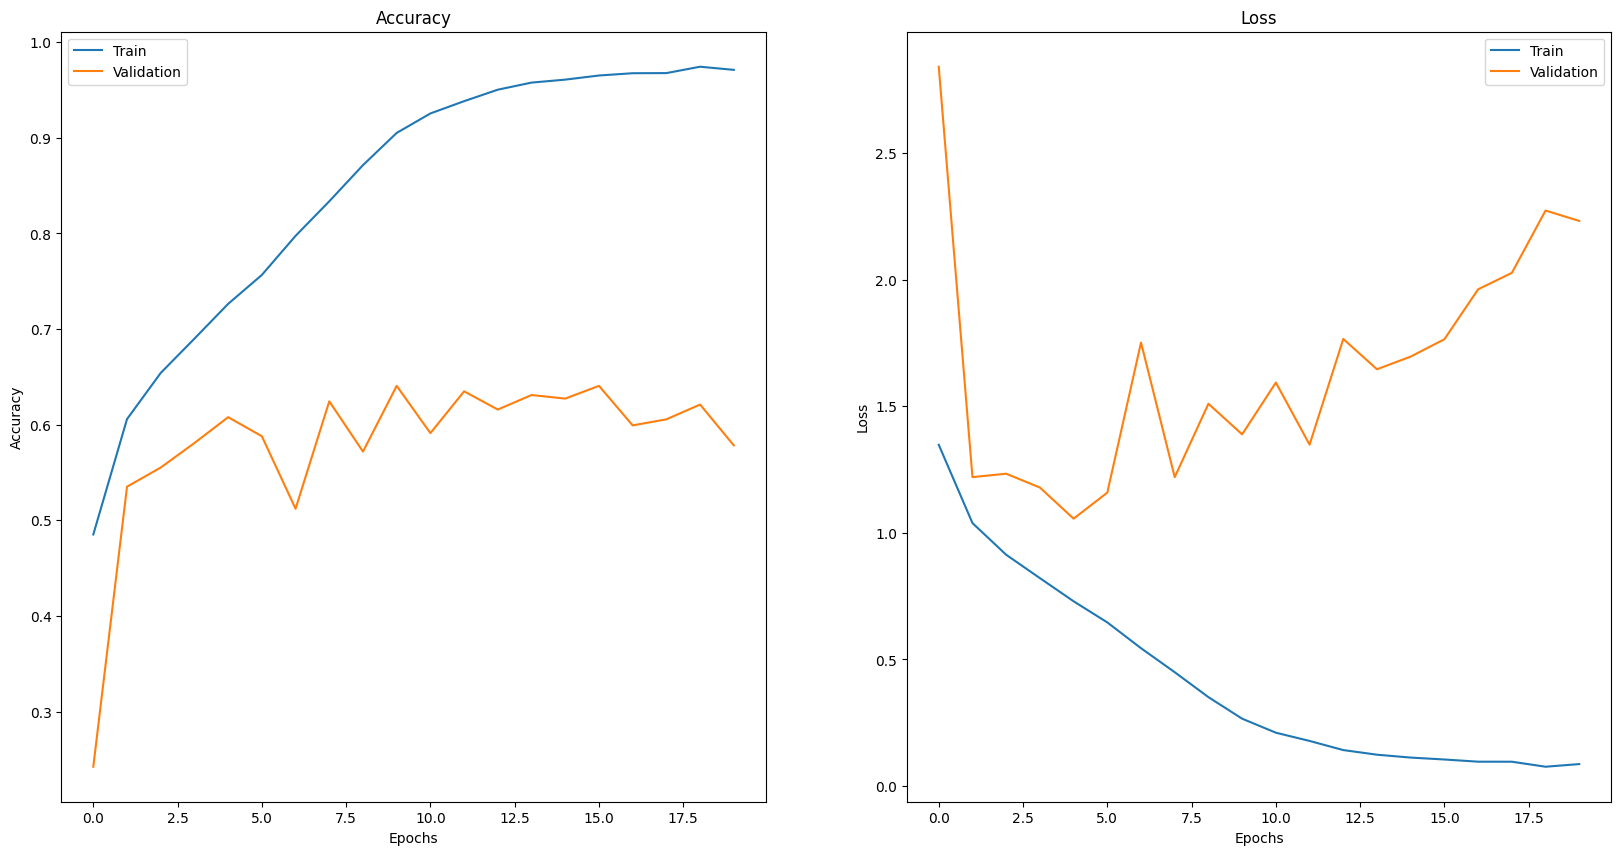

In [130]:
plot_history(loaded_history_dict)

321/321 [==============================] - 337s 1s/step


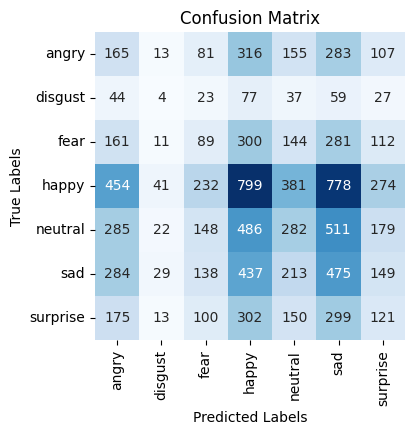

In [131]:
classes = test_data_generator.classes
predicted_classes = np.argmax(loaded_model.predict(test_data_generator, steps=np.ceil(test_data_generator.samples/test_data_generator.batch_size)), axis=1)
class_labels = list(test_data_generator.class_indices.keys())
cm = draw_confusion_matrix(classes, predicted_classes, class_labels)

The model showed improved performance on the 'sad' class compared to the forth model. However, the overall accuracy decreased, and the training behavior on the validation set appeared quite unstable throughout the epochs.

After training this model, I realized that I cannot entirely attribute its lower performance to the preprocessing stage of super resolution. Since I also added dropout layers and made some changes to the model Architecture.

I retrained it without the dropout layers to ensure that the only difference between this model and the fourth one was the application of super resolution.


In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

modified_model = base_model.output
modified_model = GlobalAveragePooling2D()(modified_model)
modified_model = Dense(1024, activation='relu')(modified_model)
modified_model = Dense(NUM_CLASSES, activation='softmax')(modified_model)

model = Model(inputs=base_model.input, outputs=modified_model)
model.trainable = True
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [ ]:
history = model.fit(
    training_data_generator,
    steps_per_epoch=training_data_generator.samples // BATCH_SIZE,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.samples // BATCH_SIZE,
    epochs=20,
    callbacks=[early_stopping])

Epoch 1/20
1008/1008 [==============================] - 1414s 1s/step - loss: 1.4846 - accuracy: 0.4163 - val_loss: 2.0060 - val_accuracy: 0.3497
Epoch 2/20
1008/1008 [==============================] - 1381s 1s/step - loss: 1.1108 - accuracy: 0.5773 - val_loss: 1.5672 - val_accuracy: 0.4770
Epoch 3/20
1008/1008 [==============================] - 1381s 1s/step - loss: 0.9458 - accuracy: 0.6432 - val_loss: 1.4271 - val_accuracy: 0.4880
Epoch 4/20
1008/1008 [==============================] - 1381s 1s/step - loss: 0.8500 - accuracy: 0.6772 - val_loss: 1.0970 - val_accuracy: 0.5929
Epoch 5/20
1008/1008 [==============================] - 1382s 1s/step - loss: 0.7572 - accuracy: 0.7153 - val_loss: 1.4169 - val_accuracy: 0.5243
Epoch 6/20
1008/1008 [==============================] - 1381s 1s/step - loss: 0.6667 - accuracy: 0.7510 - val_loss: 1.0058 - val_accuracy: 0.6281
Epoch 7/20
1008/1008 [==============================] - 1380s 1s/step - loss: 0.5750 - accuracy: 0.7833 - val_loss: 1.3335 -

In [132]:
test_data_generator  = data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')

Found 10246 images belonging to 7 classes.


In [133]:
from tensorflow.keras.models import load_model
import json
model_path = '/content/drive/My Drive/resnet50_modified_and_improved_model_v2.h5'
loaded_model = load_model(model_path)

# Load the training history
history_path = '/content/drive/My Drive/training_history_improved_model_v2.json'
with open(history_path, 'r') as f:
    loaded_history_dict = json.load(f)

Let’s examine the accuracy now:

In [134]:
test_loss, test_accu = loaded_model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 338s 1s/step - loss: 2.1164 - accuracy: 0.6214
final test accuracy = 62.14


We can now officially conclude that super-resolution had the opposite effect from what I expected and actually caused the accuracy to decrease.

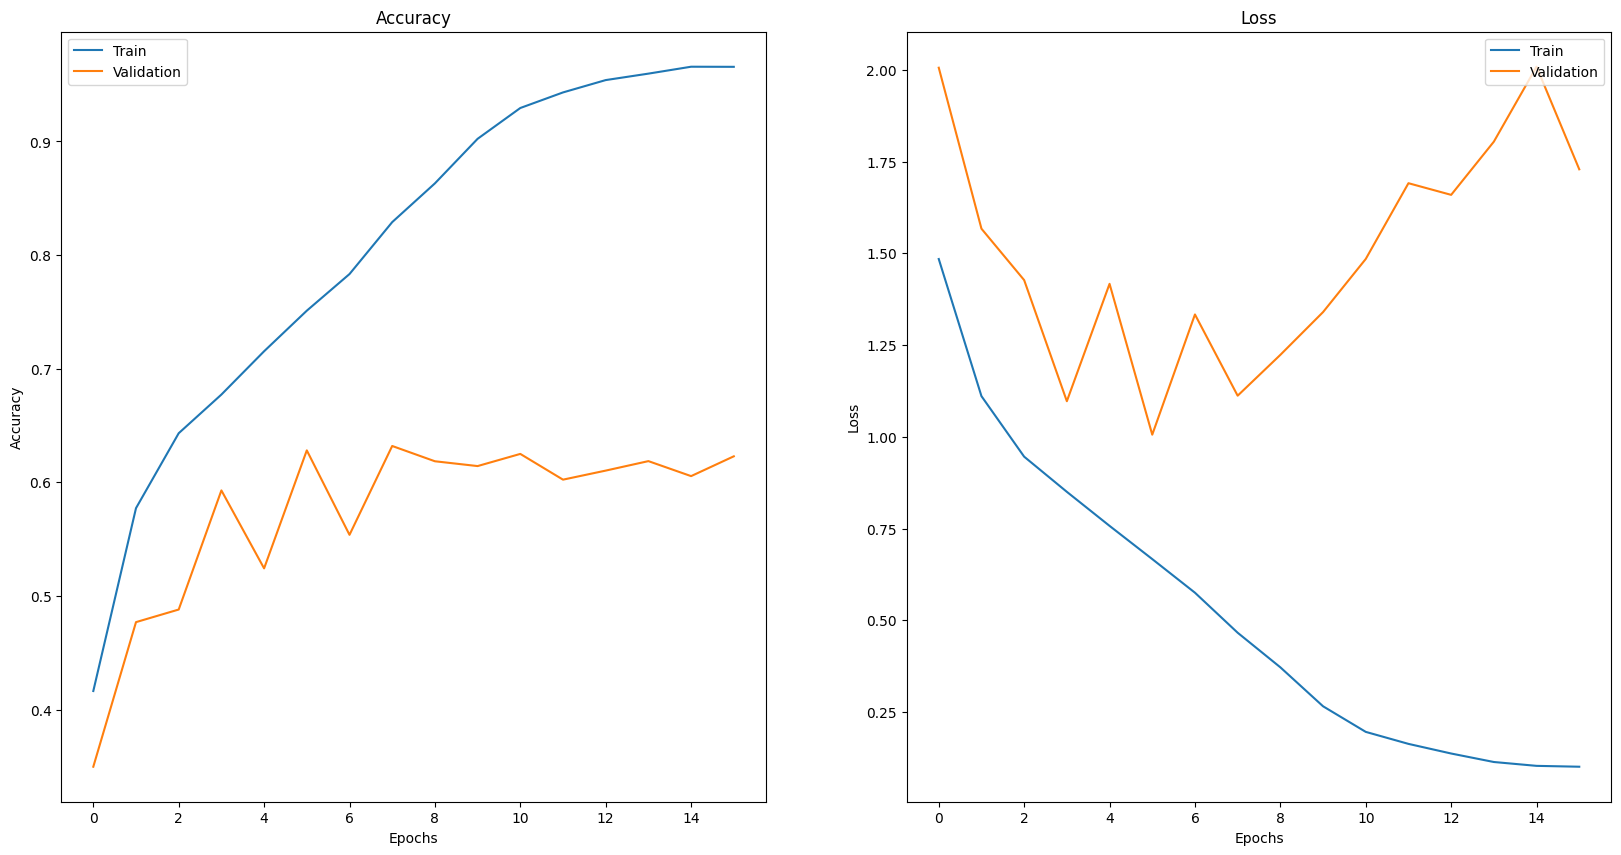

In [135]:
plot_history(loaded_history_dict)

321/321 [==============================] - 337s 1s/step


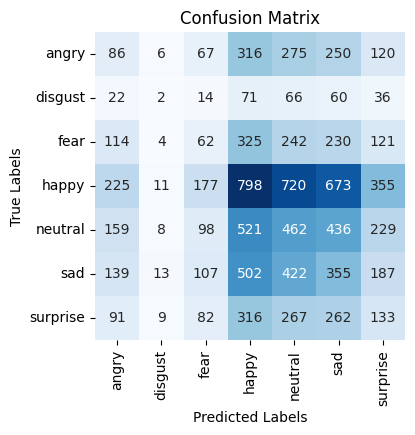

In [136]:
classes = test_data_generator.classes
predicted_classes = np.argmax(loaded_model.predict(test_data_generator, steps=np.ceil(test_data_generator.samples/test_data_generator.batch_size)), axis=1)
class_labels = list(test_data_generator.class_indices.keys())
cm = draw_confusion_matrix(classes, predicted_classes, class_labels)

Again, we can see that the models perform quite well in predicting the 'happy' class but perform poorly on the 'disgust' class, even though I added augmentations for it. The dropout layers did help somewhat, but they didn’t make a significant difference.

We observed that the model, which includes both dropout layers and a super-resolution technique in the preprocessing stage, performs worse than the model without these 'improvements.'

 Upon investigation, I found that the super-resolution technique can sometimes introduce artificial noise into the images. As a result, the model may start learning these artifacts instead of the actual features relevant to the task, leading to overfitting.
I presume this might be the reason for the lower performance in the 'improved' model.

#CONCLUSIONS


##Results

In [3]:
import pandas as pd

# Create a DataFrame
data = {
    'Model': ['Decision Tree Classifier','Random Forest Classifier','CNN','ResNet50V2','ResNet50V2 + Super Resolution'],
    'Accuracy': [0.345, 0.425, 0.644, 0.642, 0.624]
}
df = pd.DataFrame(data)

df.style.format({
    'Accuracy': '{:.3f}'.format
}).set_properties(
    **{'text-align': 'left'},
    subset=['Model', 'Accuracy']
).set_table_styles(
    [{'selector': 'th',
      'props': [('text-align', 'left')]}]
).hide(axis='index')


Model,Accuracy
Decision Tree Classifier,0.345
Random Forest Classifier,0.425
CNN,0.644
ResNet50V2,0.642
ResNet50V2 + Super Resolution,0.624


##Models summary and conclutions
**Decision Tree Classifier** - The model showed very low accuracy and appeared to suffer the most from overfitting. It primarily classified most images as 'happy,' and even after applying class weights and other adjustments, performance did not improve.

**Random Forest Classifier** - Improved upon the previous model but still did not achieve very impressive accuracy, regardless of weight balancing.

**CNN** - I consider it the best model since its accuracy on the test dataset was the highest. To further stabilize its accuracy and validation loss during training, I could explore additional strategies such as implementing learning rate scheduling and employing data augmentation to enhance the diversity of the training data. Additionally, experimenting with different optimizers or adjusting their parameters might help achieve more consistent performance

**Resnet50v2** -This model achieved a similar accuracy on the test dataset compared to the CNN (the third model), so I can consider it a notable achievement as well. since its more complex structure and despite using transfer-learning technique, it took longer to train than the CNN model (third model). However, the comparison is not entirely fair since the CNN model has a much simpler network architecture.

**ResNet50V2 + Super Resolution** - Achieved lower accuracy on the test dataset compared to the previous CNN models, especially in comparison to the fourth model, on which this model is based. Additionally, this model took a significant amount of time to train, approximately 7 hours.

**More improvments ideas**-

1. For the Super-Resolution + ResNet50 model (Fifth model), investigating the effect of applying advanced denoising methods before feeding images into the model could be beneficial.Sunce my primary concern was that the decreased performance when adding the super-resolution preprocessing stage might be due to artifacts introduced by this stage.


2. It seems that most of my models suffered from overfitting. Although I attempted to address this by using dropout layers in the CNN model and applying data augmentation. consider applying data augmentation to the entire dataset or training the modified ResNet models for fewer epochs could be beneficial for that issue, given that it is already a pre-trained model.

##General conclutions
* We can see that the model that performed the best on the combined dataset was the third model, which is the CNN that was built and trained from scratch. Although the ResNet50V2 (forth model) without the improvement achieved very similar performance.

* Most models performed well on the 'happy' class. Despite undersampling it in the last three models, the 'happy' class achieved better results compared to the 'neutral' class, which has the same number of images. This indicates that the models could learn the 'happy' patterns better.

* Although I tried to balance the dataset before feeding it into the CNNs (all the last three models) and avoid overfitting by augmenting the low-appearance class 'Disgust', it seems like most of my models still suffered from overfitting, and most models performed poorly on the low-appearance classes.

* Combining two datasets was not easy, especially when one of them is FER2013, which is currently one of the most complex datasets in the field. Combining datasets can provide a richer and more diverse set of examples, which helps models generalize better and perform well on varied data.
However, it can also lead to imbalance if one dataset is more dominant. The model might become biased toward the features of the larger or higher-quality dataset. This imbalance could contribute to overfitting, as the model may not perform well on new data that is more similar to the less dominant dataset. In our case, this also could have been the reason for overfitting, as our distributions of RGB and grayscale images were not balanced, and the class distribution in the combined dataset was not perfectly balanced, despite my efforts to correct it.

#SELF-REFLECTION
Initially, the task appeared challenging, and it indeed was. Preprocessing the data was more complex than expected, especially given the two datasets with their many differences. Additionally, the training times for the final models were very high and required robust hardware.

I started this project with excitement, expecting it to be interesting. Now, I am even more thrilled after after delving into the field. I’ve seen how even within a narrow domain, there are numerous architectures and ideas, along with a lot of trial and error, to improve and achieve better results.

This experience has made me think, read, and investigate extensively.
It has strengthened my interest in data science and my desire to pursue further studies (M.Sc.) with a focus on this field.





**THANK YOU FOR READING!**
